# Part 0: Load in Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import localcider
from localcider.sequenceParameters import SequenceParameters
import re
import math
import scipy
from scipy.stats import ks_2samp
from matplotlib.patches import Rectangle
import pathlib
from matplotlib import font_manager
from matplotlib.pyplot import gcf


# Setup the fonts
fonts_path = pathlib.Path.home().joinpath('fonts') # i.e. `~/fonts` (update as needed)
font_filename = 'ARIAL.TTF'
font_path = fonts_path.joinpath(font_filename)
print(font_path)

font_manager.fontManager.addfont(str(font_path))
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42

COLOR_MAP = dict()
COLOR_MAP['A']         = '#8c8c8c'
COLOR_MAP['CHNQST']    = '#077a15'
COLOR_MAP['DE']        = '#e23a36'
COLOR_MAP['FWY']       = '#f58220'
COLOR_MAP['G']         = '#86bd8d'
COLOR_MAP['ILMV']      = '#231f20'
COLOR_MAP['KR']        = '#1725c2'
COLOR_MAP['P']         = '#c25fc9'


# Using the global color map, we convert the colormap of amino acid
# groups, to a map against individual amino acids. This
# serves as our internal color map which is used for styling.
aacolor_map=dict()
for amino_acids in COLOR_MAP:
    for amino_acid in amino_acids:
        aacolor_map[amino_acid] = COLOR_MAP[amino_acids]

/home/research/kiersten.ruff/fonts/ARIAL.TTF


# Part 1: Load in IDRome Data

## 1.1 - Load in All Sapiens Disordered Stretches >=30

In [2]:
# uses nardini_env
import pandas as pd
import seaborn as sbn

speciesname='sapiens'

# Gene names table
mapdf=pd.read_table('../general_data/sapiens_uniprot_gene_name.tsv')
accsmap=mapdf['Uniprot'].tolist()
genesmap=mapdf['Gene'].tolist()

myseqs=[]
fullaccswnums=[]
goodidxs=[]
badidxs=[]
fullaccs=[]
mygenes=[]
seqlens=[]

myfile = open('../general_data/idrs_min_length_30/'+speciesname, 'r')
Lines = myfile.readlines()

count=0
for line in Lines:
    count=count+1
    fullline=line.split(" ")
    tmpseq=fullline[3]
    tmpacc=fullline[0]
    currseq=tmpseq.strip('\n')
    
    if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
        myseqs.append(currseq)
        fullaccswnums.append(tmpacc)
        goodidxs.append(count)
        seqlens.append(len(currseq))
        tmp=tmpacc.split("_")
        fullaccs.append(tmp[0])
        if tmp[0] in accsmap:
            currgidx=accsmap.index(tmp[0])
            mygenes.append(genesmap[currgidx]+' IDR'+tmp[1])
        else:
            mygenes.append(tmp[0]+' IDR'+tmp[1])
    else:
        badidxs.append(count)
        
print(len(myseqs))
print(count)
print(len(goodidxs))
print(badidxs)
#print(mygenes)

24508
24535
24508
[337, 338, 5387, 7965, 8270, 8860, 9309, 13434, 18343, 20894, 20895, 20896, 20897, 20898, 20900, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20909, 21628, 22016, 23960]


## 1.2 - Load NARDINI data for all sapiens IDRs gte 30

In [3]:
import numpy as np
zvec=np.load('../general_data/'+speciesname+'_full_idrome_gte_30_nardini.npy')
#print(zvec)

# check vector
idx=fullaccswnums.index('Q8NFD5_1')
print(myseqs[idx])
print(zvec[idx])
print(zvec[idx][21])
print(len(zvec))

myfeat=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly','Frac A','Frac C','Frac D','Frac E','Frac F','Frac G','Frac H','Frac I','Frac K','Frac L','Frac M','Frac N','Frac P','Frac Q','Frac R','Frac S','Frac T','Frac V','Frac W','Frac Y','Frac K+R','Frac D+E','Frac Polar','Frac Aliphatic','Frac Aromatic','R/K Ratio','E/D Ratio','Frac Chain Expanding','FCR','NCPR','Hydrophobicity','Disorder Promoting','Iso point','PPII','A Patch','C Patch','D Patch','E Patch','F Patch','G Patch','H Patch','I Patch','K Patch','L Patch','M Patch','N Patch','P Patch','Q Patch','R Patch','S Patch','T Patch','V Patch','Y Patch','RG Frac']

myfeatnardini=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly']

print(len(myfeat))

MAHNAGAAAAAGTHSAKSGGSEAALKEGGSAAALSSSSSSSAAAAAASSSSSSGPGSAMETGLLPNHKLKTVGEAPAAPPHQQHHHHHHAHHHHHHAHHLHHHHALQQQLNQFQQQQQQQQQQQQQQQQQQHPISNNNSLGGAGGGAPQPGPDMEQPQHGGAKDSAAGGQADPPGPPLLSKPGDEDDAPPKMGEPAGGRYEHPGLGALGTQQPPVAVPGGGGGPAAVPEFNNYYGSAAPASGGPGGRAGPCFDQHGGQQSPGMGMMHSASAAAAGAPGSMDPLQNSHEGYPNSQCNHYPGYSRPGAGGGGGGGGGGGGGSGGGGGGGGAGAGGAGAGAVAAAAAAAAAAAGGGGGGGYGGSSAGYGVLSSPRQQGGGMMMGPGGGGAASLSKAAAGSAAGGFQRFAGQNQHPSGATPTLNQLLTSPSPMMRSYGGSYPEYSSPSAPPPPPSQPQSQAAAAGAAAGGQQAAAGMGLGKD
[10.59108354  0.          0.          0.          0.         11.65941098
  0.         14.39589484  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  5.76110201  0.          7.43819192  0.          0.          7.20103122]
0.0
24508
90


## 1.3 - Get all compositional sequence features the sapiens IDRome

[0.07741329870246792, 0.008538805724799583, 0.05127727736370751, 0.09008763614629162, 0.014270327223274142, 0.08332631606660568, 0.023213564275380197, 0.01785675831127527, 0.06098073687889461, 0.05867819723550179, 0.016164841817388885, 0.030837123165538154, 0.11307352429649098, 0.05451395702245792, 0.06577801431451794, 0.12502566544640797, 0.05722109753347246, 0.03588171932609476, 0.005580771458323423, 0.010280367691109179, 0.12675875119341254, 0.14136491350999913, 0.38267652923466194, 0.20599481539272863, 0.030131466372706743, 0.05493351039784072, 0.1841411803139005, 0.3811971889999026, 0.26812366470341165, -0.01460616231658658, 3.4110708906101537, 0.8019110880466948, 7.44443247900792, 0.4044778171527079, 0.013228570102474755, 2.8313019279589203e-06, 0.00565433376114803, 0.024103760059206916, 1.1039838114785175e-05, 0.023394616782112673, 0.0014528601714245697, 1.625241407649792e-05, 0.012782162346973061, 0.0011648168919885275, 9.498442431682362e-05, 0.0008614367526042599, 0.0403653516

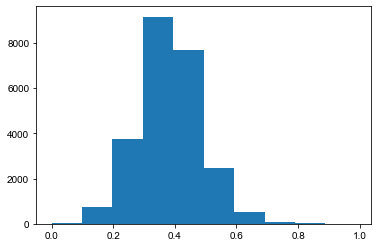

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import localcider
from localcider.sequenceParameters import SequenceParameters
import re

numInt=2 # Number of allowable interruption residues
minBlockLen=4 # Must have at least minBlockLen lysines in the block

aas='ACDEFGHIKLMNPQRSTVY' # For pathces - no W patch in proteome so this is removed
#aas='CEK'

filename=[speciesname]

for fname in filename:
    myfile = open('../general_data/idrs_min_length_30/'+fname, 'r')
    Lines = myfile.readlines()
    fracA=[]
    fracC=[]
    fracD=[]
    fracE=[]
    fracF=[]
    fracG=[]
    fracH=[]
    fracI=[]
    fracK=[]
    fracL=[]
    fracM=[]
    fracN=[]
    fracP=[]
    fracQ=[]
    fracR=[]
    fracS=[]
    fracT=[]
    fracV=[]
    fracW=[]
    fracY=[]
    fracpos=[]
    fracneg=[]
    fracpol=[]
    fracali=[]
    fracaro=[]
    fracRtoK=[]
    fracEtoD=[]
    fracexp=[]
    fcr=[]
    ncpr=[]
    mhydro=[]
    dispro=[]
    isopoi=[]
    ppii=[]
    fracpatch=[[] for _ in range(len(aas))]
    rgpatch=[]
    
    for line in Lines:
        fullline=line.split(" ")
        tmpseq=fullline[3]
        currseq=tmpseq.strip('\n')

        if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
            SeqOb = SequenceParameters(currseq)
            slen=SeqOb.get_length()
            aafrac=SeqOb.get_amino_acid_fractions()
            
            fracexp.append(SeqOb.get_fraction_expanding())
            fcr.append(SeqOb.get_FCR())
            ncpr.append(SeqOb.get_NCPR())
            mhydro.append(SeqOb.get_mean_hydropathy())
            dispro.append(SeqOb.get_fraction_disorder_promoting())
            isopoi.append(SeqOb.get_isoelectric_point())
            ppii.append(SeqOb.get_PPII_propensity(mode='hilser'))

            ## AA Fractions
            fracA.append(aafrac['A'])
            fracC.append(aafrac['C'])
            fracD.append(aafrac['D'])
            fracE.append(aafrac['E'])
            fracF.append(aafrac['F'])
            fracG.append(aafrac['G'])
            fracH.append(aafrac['H'])
            fracI.append(aafrac['I'])
            fracK.append(aafrac['K'])
            fracL.append(aafrac['L'])
            fracM.append(aafrac['M'])
            fracN.append(aafrac['N'])
            fracP.append(aafrac['P'])
            fracQ.append(aafrac['Q'])
            fracR.append(aafrac['R'])
            fracS.append(aafrac['S'])
            fracT.append(aafrac['T'])
            fracV.append(aafrac['V'])
            fracW.append(aafrac['W'])
            fracY.append(aafrac['Y'])

            ## AA Physicochemical properties
            fracpos.append(aafrac['K']+aafrac['R'])
            fracneg.append(aafrac['D']+aafrac['E'])
            fracpol.append(aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])
            fracali.append(aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])
            fracaro.append(aafrac['F']+aafrac['W']+aafrac['Y'])
            
            ## AA ratios
            fracRtoK.append(np.log10(((slen*aafrac['R'])+1)/((slen*aafrac['K'])+1)))
            fracEtoD.append(np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1)))
            
            ## Fraction of sequence containing patches
            counta=-1
            for a in aas:
                counta=counta+1
                justKs='0'*len(currseq) # Set string of zeros

                pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

                # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
                pos2=pos
                for p in range(0,len(pos)-1):
                    tdi=pos[p+1]-pos[p]
                    if tdi > 1 and tdi<=numInt+1:
                        myt=list(range(pos[p]+1,pos[p+1]))
                        for item in myt:
                            pos2.append(item)


                # For positions make those 1 in string of zeros   
                justKs = list(justKs)
                for p in pos2:
                    justKs[p]='1'
                justKs = ''.join(justKs)


                the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
                idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

                numpatches=0
                count=-1
                patchescombined=''
                for o in the_ones:
                    count=count+1
                    myrange=idx_ones[count] # Get indices for each consecutive strength
                    subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                    pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
                    # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
                    if len(pos3)>=minBlockLen:
                        numpatches=numpatches+1
                        patchescombined+=subseq

                fracpatch[counta].append(len(patchescombined)/len(currseq))
                
            ## Fraction of sequence in RG stretch
            justKs='0'*len(currseq) # Set string of zeros
            pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

            # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
            pos2=pos
            for p in range(0,len(pos)-1):
                tdi=pos[p+1]-pos[p]
                if tdi > 1 and tdi<=numInt+1:
                    myt=list(range(pos[p]+1,pos[p+1]))
                    for item in myt:
                        pos2.append(item)

            # For positions make those 1 in string of zeros             
            justKs = list(justKs)
            for p in pos2:
                justKs[p]='1'
            justKs = ''.join(justKs)

            the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
            idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

            count=-1
            patchescombined=''
            for o in the_ones:
                count=count+1
                myrange=idx_ones[count] # Get indices for each consecutive strength
                subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                pos3=subseq.count('RG')
                #print(subseq)
                if pos3>=2:
                    patchescombined+=subseq

            rgpatch.append(len(patchescombined)/len(currseq))

    meanvals_sapiens=[np.mean(fracA), np.mean(fracC), np.mean(fracD), np.mean(fracE), np.mean(fracF), np.mean(fracG), np.mean(fracH), np.mean(fracI), np.mean(fracK), np.mean(fracL), np.mean(fracM), np.mean(fracN), np.mean(fracP), np.mean(fracQ), np.mean(fracR), np.mean(fracS), np.mean(fracT), np.mean(fracV), np.mean(fracW), np.mean(fracY), np.mean(fracpos), np.mean(fracneg), np.mean(fracpol), np.mean(fracali), np.mean(fracaro), np.mean(fracRtoK), np.mean(fracEtoD), np.mean(fracexp), np.mean(fcr), np.mean(ncpr), np.mean(mhydro), np.mean(dispro), np.mean(isopoi), np.mean(ppii)]
    stdvals_sapiens=[np.std(fracA), np.std(fracC), np.std(fracD), np.std(fracE), np.std(fracF), np.std(fracG), np.std(fracH), np.std(fracI), np.std(fracK), np.std(fracL), np.std(fracM), np.std(fracN), np.std(fracP), np.std(fracQ), np.std(fracR), np.std(fracS), np.std(fracT), np.std(fracV), np.std(fracW), np.std(fracY), np.std(fracpos), np.std(fracneg), np.std(fracpol), np.std(fracali), np.std(fracaro), np.std(fracRtoK), np.std(fracEtoD), np.std(fracexp), np.std(fcr), np.std(ncpr), np.std(mhydro), np.std(dispro), np.std(isopoi), np.std(ppii)]
    
    for a in fracpatch:
        meanvals_sapiens.append(np.mean(a))
        stdvals_sapiens.append(np.std(a))
    
    meanvals_sapiens.append(np.mean(rgpatch))
    stdvals_sapiens.append(np.std(rgpatch))
    

    print(meanvals_sapiens)
    print(stdvals_sapiens)
    print(len(rgpatch))
    print(len(fracA))
    print(np.mean(rgpatch))
    print(np.std(rgpatch))
    
    
    plt.hist(fracpol)

## 1.4 - Add non-patterning features to feature vector

In [5]:
# Remove the number of the IDR in the full human IDRome accession list
fullacc=fullaccs
    
typeall=['pol','hyd','pos','neg','aro','ala','pro','gly']
zvecaa=np.zeros((len(myseqs),int(len(typeall)+(len(typeall)*(len(typeall)-1))/2)+34+len(aas)+1))
tmp=zvec

countseq=-1
for currseq in myseqs:
    countseq=countseq+1
    tmpacc=fullacc[countseq]
    SeqOb = SequenceParameters(currseq)
    
    slen=SeqOb.get_length()
    aafrac=SeqOb.get_amino_acid_fractions()
    
    fracexp=SeqOb.get_fraction_expanding()
    fcr=SeqOb.get_FCR()
    ncpr=SeqOb.get_NCPR()
    mhydro=SeqOb.get_mean_hydropathy()
    dispro=SeqOb.get_fraction_disorder_promoting()
    isopoi=SeqOb.get_isoelectric_point()
    ppii=SeqOb.get_PPII_propensity(mode='hilser')
    
    tmpseq=[]
    
    ## AA Fractions
    afA=np.array((aafrac['A']-meanvals_sapiens[0])/stdvals_sapiens[0])
    tmpseq.append(afA)
    afC=np.array((aafrac['C']-meanvals_sapiens[1])/stdvals_sapiens[1])
    tmpseq.append(afC)
    afD=np.array((aafrac['D']-meanvals_sapiens[2])/stdvals_sapiens[2])
    tmpseq.append(afD)
    afE=np.array((aafrac['E']-meanvals_sapiens[3])/stdvals_sapiens[3])
    tmpseq.append(afE)
    afF=np.array((aafrac['F']-meanvals_sapiens[4])/stdvals_sapiens[4])
    tmpseq.append(afF)
    afG=np.array((aafrac['G']-meanvals_sapiens[5])/stdvals_sapiens[5])
    tmpseq.append(afG)
    afH=np.array((aafrac['H']-meanvals_sapiens[6])/stdvals_sapiens[6])
    tmpseq.append(afH)
    afI=np.array((aafrac['I']-meanvals_sapiens[7])/stdvals_sapiens[7])
    tmpseq.append(afI)
    afK=np.array((aafrac['K']-meanvals_sapiens[8])/stdvals_sapiens[8])
    tmpseq.append(afK)
    afL=np.array((aafrac['L']-meanvals_sapiens[9])/stdvals_sapiens[9])
    tmpseq.append(afL)
    afM=np.array((aafrac['M']-meanvals_sapiens[10])/stdvals_sapiens[10])
    tmpseq.append(afM)
    afN=np.array((aafrac['N']-meanvals_sapiens[11])/stdvals_sapiens[11])
    tmpseq.append(afN)
    afP=np.array((aafrac['P']-meanvals_sapiens[12])/stdvals_sapiens[12])
    tmpseq.append(afP)
    afQ=np.array((aafrac['Q']-meanvals_sapiens[13])/stdvals_sapiens[13])
    tmpseq.append(afQ)
    afR=np.array((aafrac['R']-meanvals_sapiens[14])/stdvals_sapiens[14])
    tmpseq.append(afR)
    afS=np.array((aafrac['S']-meanvals_sapiens[15])/stdvals_sapiens[15])
    tmpseq.append(afS)
    afT=np.array((aafrac['T']-meanvals_sapiens[16])/stdvals_sapiens[16])
    tmpseq.append(afT)
    afV=np.array((aafrac['V']-meanvals_sapiens[17])/stdvals_sapiens[17])
    tmpseq.append(afV)
    afW=np.array((aafrac['W']-meanvals_sapiens[18])/stdvals_sapiens[18])
    tmpseq.append(afW)
    afY=np.array((aafrac['Y']-meanvals_sapiens[19])/stdvals_sapiens[19])
    tmpseq.append(afY)
    
    ## AA Physicochemical properties
    afpos=np.array(((aafrac['K']+aafrac['R'])-meanvals_sapiens[20])/stdvals_sapiens[20])
    tmpseq.append(afpos)
    afneg=np.array(((aafrac['D']+aafrac['E'])-meanvals_sapiens[21])/stdvals_sapiens[21])
    tmpseq.append(afneg)
    afpol=np.array(((aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])-meanvals_sapiens[22])/stdvals_sapiens[22])
    tmpseq.append(afpol)
    afali=np.array(((aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])-meanvals_sapiens[23])/stdvals_sapiens[23])
    tmpseq.append(afali)
    afaro=np.array(((aafrac['F']+aafrac['W']+aafrac['Y'])-meanvals_sapiens[24])/stdvals_sapiens[24])
    tmpseq.append(afaro)
    
    ## AA ratios
    afRK=np.array((np.log10(((slen*aafrac['R'])+1)/((slen*aafrac['K'])+1))-meanvals_sapiens[25])/stdvals_sapiens[25])
    tmpseq.append(afRK)
    afED=np.array((np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1))-meanvals_sapiens[26])/stdvals_sapiens[26])
    tmpseq.append(afED)
    
    ## Charge measures
    afexp=np.array((fracexp-meanvals_sapiens[27])/stdvals_sapiens[27])
    tmpseq.append(afexp)
    afcr=np.array((fcr-meanvals_sapiens[28])/stdvals_sapiens[28])
    tmpseq.append(afcr)
    ancpr=np.array((ncpr-meanvals_sapiens[29])/stdvals_sapiens[29])
    tmpseq.append(ancpr)
    
    ## Miscellaneous measures
    amhydro=np.array((mhydro-meanvals_sapiens[30])/stdvals_sapiens[30])
    tmpseq.append(amhydro)
    adispro=np.array((dispro-meanvals_sapiens[31])/stdvals_sapiens[31])
    tmpseq.append(adispro)
    aisopoi=np.array((isopoi-meanvals_sapiens[32])/stdvals_sapiens[32])
    tmpseq.append(aisopoi)
    appii=np.array((ppii-meanvals_sapiens[33])/stdvals_sapiens[33])
    tmpseq.append(appii)
    
    ## Fraction of sequence containing patches
    counta=-1
    for a in aas:
        counta=counta+1
        justKs='0'*len(currseq) # Set string of zeros

        pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

        # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
        pos2=pos
        for p in range(0,len(pos)-1):
            tdi=pos[p+1]-pos[p]
            if tdi > 1 and tdi<=numInt+1:
                myt=list(range(pos[p]+1,pos[p+1]))
                for item in myt:
                    pos2.append(item)


        # For positions make those 1 in string of zeros   
        justKs = list(justKs)
        for p in pos2:
            justKs[p]='1'
        justKs = ''.join(justKs)


        the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
        idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

        numpatches=0
        count=-1
        patchescombined=''
        for o in the_ones:
            count=count+1
            myrange=idx_ones[count] # Get indices for each consecutive strength
            subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
            pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
            # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
            if len(pos3)>=minBlockLen:
                numpatches=numpatches+1
                patchescombined+=subseq

        afracpatch=(len(patchescombined)/len(currseq))
        afracp=np.array((afracpatch-meanvals_sapiens[33+counta+1])/stdvals_sapiens[33+counta+1])
        tmpseq.append(afracp)
    
    ## Fraction of sequence in RG stretch
    justKs='0'*len(currseq) # Set string of zeros
    pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

    # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
    pos2=pos
    for p in range(0,len(pos)-1):
        tdi=pos[p+1]-pos[p]
        if tdi > 1 and tdi<=numInt+1:
            myt=list(range(pos[p]+1,pos[p+1]))
            for item in myt:
                pos2.append(item)

    # For positions make those 1 in string of zeros             
    justKs = list(justKs)
    for p in pos2:
        justKs[p]='1'
    justKs = ''.join(justKs)

    the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
    idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

    count=-1
    patchescombined=''
    for o in the_ones:
        count=count+1
        myrange=idx_ones[count] # Get indices for each consecutive strength
        subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
        pos3=subseq.count('RG')
        if pos3>=2:
            patchescombined+=subseq

    arg=(len(patchescombined)/len(currseq))
    argp=np.array((arg-meanvals_sapiens[33+counta+2])/stdvals_sapiens[33+counta+2])
    tmpseq.append(argp)
    
    zvecaa[countseq,:]=np.append(tmp[countseq,:],tmpseq)
    #print(np.append(zvecaa[countseq,:],afA))
    #print((zvecaa))
    
    
print(np.shape(zvecaa))

# check vector
idx=fullaccswnums.index('Q8NFD5_1')
print(myseqs[idx])
print(zvecaa[idx])


(24508, 90)
MAHNAGAAAAAGTHSAKSGGSEAALKEGGSAAALSSSSSSSAAAAAASSSSSSGPGSAMETGLLPNHKLKTVGEAPAAPPHQQHHHHHHAHHHHHHAHHLHHHHALQQQLNQFQQQQQQQQQQQQQQQQQQHPISNNNSLGGAGGGAPQPGPDMEQPQHGGAKDSAAGGQADPPGPPLLSKPGDEDDAPPKMGEPAGGRYEHPGLGALGTQQPPVAVPGGGGGPAAVPEFNNYYGSAAPASGGPGGRAGPCFDQHGGQQSPGMGMMHSASAAAAGAPGSMDPLQNSHEGYPNSQCNHYPGYSRPGAGGGGGGGGGGGGGSGGGGGGGGAGAGGAGAGAVAAAAAAAAAAAGGGGGGGYGGSSAGYGVLSSPRQQGGGMMMGPGGGGAASLSKAAAGSAAGGFQRFAGQNQHPSGATPTLNQLLTSPSPMMRSYGGSYPEYSSPSAPPPPPSQPQSQAAAAGAAAGGQQAAAGMGLGKD
[ 1.05910835e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.16594110e+01  0.00000000e+00  1.43958948e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.76110201e+00  0.00

# Part 2: Analyze IDRs

## 2.1 - Extract all IDRs

In [6]:
# Get all IDRs of length between 100 - 200
minlength=0
maxlength=100000
allidx_sub=[i for i,v in enumerate(seqlens) if minlength <= v <= maxlength]

#print(allidx_sub)

genenames=[]
genenamesIDRnum=[]
accs_sub=[]
currseqs=[]
curraccwnum=[]
for i in allidx_sub:
    curracc=fullaccs[i]
    
    # Get gene names with IDR number
    genenamesIDRnum.append(mygenes[i])
    #print(genenamesIDRnum)
    #print(myseqs[i])
    #print(seqlens[i])
    
    # Get gene names
    tmp=mygenes[i].split(' ')
    genenames.append(tmp[0])
    #print(genenames)
    
    # Get accessions
    accs_sub.append(fullaccs[i])
    
    # Get sequences
    currseqs.append(myseqs[i])
    
    # Get accessions with IDR numbers
    curraccwnum.append(fullaccswnums[i])
    
    #with open('IDR_'+str(minlength)+'_'+str(maxlength)+'.fasta', 'a') as f:
    #    f.write('>'+mygenes[i]+'\n')
    #    f.write(myseqs[i]+'\n')

    
#print(genenames)
#print(genenamesIDRnum)
print(len(genenamesIDRnum))



24508


## 2.2 - Test K-means clustering

[[-2.07259721 -0.96922862  0.         ... -0.05093994 -0.02154149
  -0.12989614]
 [-0.83128606 -0.86024972 -1.07216604 ... -0.05093994 -0.02154149
  -0.12989614]
 [-0.66164532 -1.75094788  0.         ... -0.05093994 -0.02154149
  -0.12989614]
 ...
 [ 0.70135827 -1.20500448  0.         ... -0.05093994 -0.02154149
  -0.12989614]
 [-1.33919789  0.         -1.42331535 ... -0.05093994 -0.02154149
  -0.12989614]
 [-0.99003645 -0.13204046 -1.10132604 ... -0.05093994 -0.02154149
  -0.12989614]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


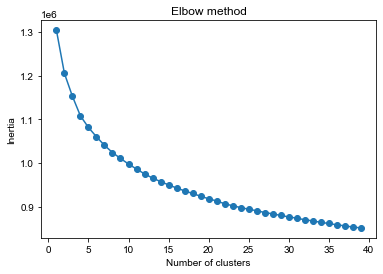

In [7]:
from sklearn.cluster import KMeans

cutoff=3

zvecaasub=zvecaa[allidx_sub,:]
for z in range(0,len(zvecaasub)):
    pos=[i for i, ltr in enumerate(zvecaasub[z,:]) if ltr > cutoff]
    zvecaasub[z,pos]=cutoff
    pos=[i for i, ltr in enumerate(zvecaasub[z,:]) if ltr < -cutoff]
    zvecaasub[z,pos]=-cutoff

data = zvecaasub
print(data)
inertias = []

maxnum=40

for i in range(1,maxnum):
    print(i)
    kmeans = KMeans(init="random",n_clusters=i, n_init=10,random_state=1)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,maxnum), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


(0.0, 15000.0)

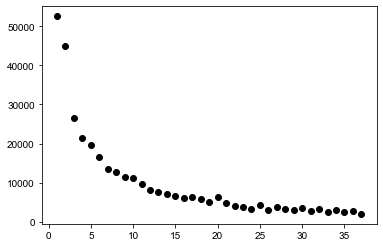

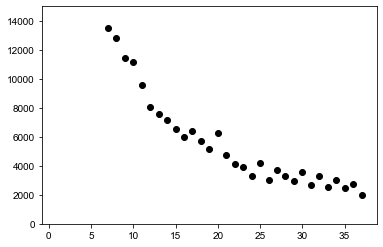

In [8]:
plt.figure()
for i in range(1,maxnum-2):
    plt.plot(i,inertias[i]-inertias[i+1],'ok')
    
plt.figure()
for i in range(1,maxnum-2):
    plt.plot(i,inertias[i]-inertias[i+1],'ok')
    
plt.ylim([0,15000])

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cutoff=3

zvecaasub=zvecaa[allidx_sub,:]
for z in range(0,len(zvecaasub)):
    pos=[i for i, ltr in enumerate(zvecaasub[z,:]) if ltr > cutoff]
    zvecaasub[z,pos]=cutoff
    pos=[i for i, ltr in enumerate(zvecaasub[z,:]) if ltr < -cutoff]
    zvecaasub[z,pos]=-cutoff

data = zvecaasub
print(data)
inertias = []

maxnum=100
rs=[1, 11, 21, 31, 41]

sscore=[[] for _ in range(len(rs))]
knum=[]
for r in range(0,len(rs)):
    for i in range(10,maxnum):
        #print(i)
        X = data
        kmeans = KMeans(init="random", n_clusters=i, n_init=10,random_state=rs[r])
        print(str(i)+': '+str(silhouette_score(X, kmeans.fit_predict(X))))
        sscore[r].append(silhouette_score(X, kmeans.fit_predict(X)))
        if r==0:
            knum.append(i)
    

[[ 2.65558243  3.          2.06370213 ... -0.05093994 -0.02154149
  -0.12989614]
 [-0.37402203 -0.3406979  -1.30681712 ... -0.05093994 -0.02154149
  -0.12989614]
 [-0.90138878  0.          0.5517045  ... -0.05093994 -0.02154149
  -0.12989614]
 ...
 [ 1.49196539 -0.0137946   1.07698451 ... -0.05093994 -0.02154149
  -0.12989614]
 [ 1.9883143   0.          0.98092741 ... -0.05093994 -0.02154149
  -0.12989614]
 [ 0.99828791 -0.54342043  0.         ... -0.05093994 -0.02154149
  -0.12989614]]
10: 0.0463580608682461
11: 0.045720997793062566
12: 0.046303307165496986
13: 0.04255788671133498
14: 0.04986723378094377
15: 0.04950694021435044
16: 0.04360620940464484
17: 0.04357797843714912
18: 0.04445797578869399
19: 0.04159639235833509
20: 0.04357654161502507
21: 0.043833277649957585
22: 0.039305329402367264
23: 0.04444510303436938
24: 0.0408215374781105
25: 0.03955360007307379
26: 0.03947156341079771
27: 0.04077644403348184
28: 0.041347136853384495
29: 0.04418248866655238
30: 0.042544786391620175


58: 0.03660314008611466
59: 0.0386927658781636
60: 0.03837410600517229
61: 0.038652515701514165
62: 0.04164682811990202
63: 0.041281488644799864
64: 0.0382053458902955
65: 0.03861426009673316
66: 0.038590014294525
67: 0.04022401469743651
68: 0.03930585044401488
69: 0.037172813635642746
70: 0.041018356738725274
71: 0.04083084006800398
72: 0.04067118134860116
73: 0.04017150437955011
74: 0.03502524929471405
75: 0.04046662257955378
76: 0.04107703230352601
77: 0.0394538018092519
78: 0.04080335121345571
79: 0.04040504526451001
80: 0.0386562944156909
81: 0.0410745777873512
82: 0.0412199566960567
83: 0.041177812930356834
84: 0.042507368604502466
85: 0.04201840711431892
86: 0.042885626999090945
87: 0.04282831345702465
88: 0.042616818022358255
89: 0.042948351031119304
90: 0.04342791790654996
91: 0.04088469000568754
92: 0.04036525562460327
93: 0.04089445198875258
94: 0.041898007762596036
95: 0.0422274234036021
96: 0.042330590873066835
97: 0.04165376975479139
98: 0.04067886125654126
99: 0.04171194

In [ ]:
print(len(sscore[0]))
for i in range(0,len(rs)):
    plt.plot(knum[0:90],sscore[i],'-')
    print(np.mean(sscore[i][0:40]))
#plt.plot([10,maxnum],[0.35, 0.35],'--k')
#plt.plot([30,30],[0,0.4],'--k')
#plt.plot([50,50],[0,0.4],'--k')
plt.title('Silhouette Coefficient Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Silhouette Coefficient')

print(sscore[0][18:23])
plt.figure()
plt.plot(np.arange(10,100,1),sscore[0],'o')
plt.plot([30,30],[0,0.05],'--k')
#plt.plot([50,50],[0,0.4],'--k')

## 2.3 - Get K-means clusters

In [9]:
from sklearn.cluster import KMeans

cutoff=3

zvecaasub=zvecaa[allidx_sub,:]
for z in range(0,len(zvecaasub)):
    pos=[i for i, ltr in enumerate(zvecaasub[z,:]) if ltr > cutoff]
    zvecaasub[z,pos]=cutoff
    pos=[i for i, ltr in enumerate(zvecaasub[z,:]) if ltr < -cutoff]
    zvecaasub[z,pos]=-cutoff

data = zvecaasub

#instantiate the k-means class, using optimal number of clusters
numkclusts=30
kmeans = KMeans(init="random", n_clusters=numkclusts, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(data)

#view cluster assignments for each observation
clusters=kmeans.labels_

print(np.shape(zvecaasub))

print(clusters)
numclust=max(clusters)
print(numclust)

#[14  9 11 ... 29  9 19]

(24508, 90)
[14  9 11 ... 29  9 19]
29


## 2.4 - Get centroids of clusters - i.e., IDR most similar to all others in cluster

In [10]:
import scipy

clustcent=[]

for c in range(0,numclust+1):
    midx = [i for i, x in enumerate(clusters) if x == c]
    # Find which protein has the lowest distance in terms of zscores from all other proteins in the cluster
    tmpmat=[]
    currgenelist=[]
    curracclist=[]
    currseqlist=[]
    for i in midx:
        tmpmat.append(zvecaa[allidx_sub[i],:])
        currgenelist.append(genenamesIDRnum[i])
        curracclist.append(accs_sub[i])
        currseqlist.append(currseqs[i])
        #print(genes_rrm[i])
    
    distvec=scipy.spatial.distance.pdist(tmpmat)
    distmat=scipy.spatial.distance.squareform(distvec)
    
    mdist=[]
    for l in distmat:
        mdist.append(np.mean(l))
        
        
    min_value = min(mdist)
    min_index=mdist.index(min_value)
    #print(mdist)
    #print(min_index)
    print('Cluster_'+str(c))
    print('>'+currgenelist[min_index])
    print(currseqlist[min_index])
    clustcent.append(currgenelist[min_index])

Cluster_0
>ZIM2 IDR2
EEESYAMETDSRHTVICQGESHDDPLEPHQGNQEKLLTPITMNDPKTLTPERSYGSDEFERSSNLSKQSKDPLGKDPQEGTAPGICTSPQSASQENKH
Cluster_1
>PCM1 IDR14
RILEDHGSPAGEIDDEDKDKDETETVKQTQTSEVYDGPKNVRSDISDQEEDEESEGCPVSINLSKAETQALTNYGSGEDENEDEEMEEFEEGPVDVQTSLQANTEATEENEHDEQVLQRDFKKTAESKNVPLEREATSKNDQNNCPVK
Cluster_2
>AGAP2 IDR3
VPGKRPPRAISAFGPSASINGLVKDMSTVQMGEGLEATTPMPSPSPSPSSLQPPPDQTSKHLLKPDRNLARALSTDCTPSGDLSPLSREPPPSPMVKKQRRKKLTTPSKTEGSAGQAEAKR
Cluster_3
>MUC16 IDR45
AVTNVGTSGSGHKSQSSVLADSETSKATPLMSTTSTLGDTSVSTSTPNISQTNQIQTEPTASLSPRLRESSTSEKTSSTTETNTAFSYVPTG
Cluster_4
>MAML1 IDR3
LMKPKPGNMPFRSLVPPGQEQNPSSVPVQAQATSVGTQPPAVSVASSHNSSPYLSSQQQAAVMKQHQLLLDQQKQREQQQKHLQQQQFLQRQQHLLAEQEKQQFQRHLTRPPPQYQDPTQGSFPQQVGQFTGSSAAVPGMNTLG
Cluster_5
>XIRP1 IDR12
PLGRHILASGPQAAGASPHPHNAFVPPPPTLPAAVTGPDFPAGAHRAEDSIQQASEPLKDPLLHSHSSPAGQRTPGGSQTKTPKLDPTMPPKKKPQLPPKPAHLTQSHPPQRLPKPLPLSPSFSSEVGQREHQRGERDTAIPQPAKVPTTVDQGHIPLARCPSGHSQPSLQHGLSTTAPRPTKNQATGSNAQSSEPPKLNALNHDPTSPQWGPGPSGEQPMEGSHQGAPESPDSLQRNQKELQGLLNQVQALEKEAASS

## 2.5 - Get cluster lists

In [11]:
genelistclust=[]
listclust=[]
acclistbyclust=[]
for c in range(0,numclust+1):
    print('Cluster_'+str(c))
    pos=[i for i, ltr in enumerate(clusters) if ltr == c]
    print(pos)

    acclist=[]
    seqlist=[]
    genelist=[]
    for p in pos: 
        acclist.append(curraccwnum[p])
        seqlist.append(currseqs[p])
        if genenamesIDRnum[p] in clustcent:
            genelist.append('*'+genenamesIDRnum[p])
        else:
            genelist.append(genenamesIDRnum[p])
        genelistclust.append(genenamesIDRnum[p])
        listclust.append(c)
        #print(p)
        print(curraccwnum[p])
        print(genenamesIDRnum[p])
        print(currseqs[p])
    
    currdf=pd.DataFrame()
    currdf['Uniprot']=acclist
    currdf['Genes']=genelist
    currdf['Sequences']=seqlist
    
    acclistbyclust.append(acclist)
    print(acclist)
    print(len(acclist))

    
    #if c==0:
    #    with pd.ExcelWriter('Test_clusts_IDR_'+str(minlength)+'_'+str(maxlength)+'_kmeans_'+str(numkclusts)+'_clusters.xlsx') as writer:  
    #        currdf.to_excel(writer, sheet_name='cluster_'+str(c))
    #else:
    #    with pd.ExcelWriter('Test_clusts_IDR_'+str(minlength)+'_'+str(maxlength)+'_kmeans_'+str(numkclusts)+'_clusters.xlsx',engine="openpyxl",mode='a') as writer:  
    #        currdf.to_excel(writer, sheet_name='cluster_'+str(c))

Cluster_0
[19, 32, 35, 50, 64, 67, 89, 99, 106, 121, 161, 169, 192, 194, 216, 236, 259, 372, 393, 443, 469, 471, 482, 484, 512, 524, 530, 534, 535, 536, 581, 597, 607, 653, 698, 699, 700, 701, 702, 729, 743, 750, 758, 789, 826, 837, 845, 880, 883, 894, 947, 948, 973, 981, 984, 1009, 1016, 1040, 1046, 1064, 1066, 1090, 1097, 1118, 1171, 1185, 1225, 1227, 1228, 1229, 1231, 1243, 1256, 1284, 1286, 1289, 1298, 1300, 1303, 1304, 1311, 1313, 1367, 1391, 1439, 1452, 1454, 1464, 1476, 1481, 1491, 1508, 1536, 1539, 1559, 1569, 1584, 1589, 1623, 1626, 1637, 1661, 1664, 1679, 1720, 1722, 1738, 1752, 1763, 1835, 1840, 1921, 1932, 1972, 1987, 2013, 2052, 2066, 2074, 2080, 2084, 2099, 2115, 2130, 2132, 2139, 2140, 2145, 2147, 2194, 2227, 2228, 2233, 2269, 2278, 2321, 2341, 2342, 2346, 2374, 2386, 2390, 2401, 2417, 2420, 2465, 2469, 2480, 2517, 2522, 2535, 2555, 2560, 2572, 2578, 2585, 2598, 2600, 2629, 2638, 2655, 2671, 2680, 2716, 2737, 2802, 2803, 2824, 2829, 2837, 2861, 2918, 2970, 2981, 2982, 29

SVIL IDR5
SQAWQPLVEGSENKGMLREYGETESKRALTGRDSG
Q5JSZ5_9
PRRC2B IDR9
GSSLGTEIWESSSQALPVQAPANDSWRKAVTAFSSTETGSAEQGFKSSQGDSGVDLSAESRESSATSSQRSSPYGTLKPEEMSGPGLAEPKADSHKEQAPKPSEQKDSEQGSGQSKEHRPGPIGNERSLKNRKGSEGAERLQGAVVPPV
Q9H6L5_2
RETREG1 IDR2
DNGTFNLSEGYTPQTDTSDDLDRPSEEVFSRDLSDFPSLENGMGTNDEDELSLGLPTELKRKKEQLDSGHRPSKETQSAAGLTLP
Q9ULL0_3
KIAA1210 IDR3
SLDDESPKNPQKKALPHKSLTATQSFSELSSGPD
Q9NPQ8_2
RIC8A IDR2
PMGMSPRGHLTSLQDAMCETMEQQLSSDPDSDPD
Q92615_2
LARP4B IDR2
LEASSAADGVSAAWEEVAGHHADRGPQGSDANGDGDQGHENAALPDPQESDPADMNALALGPSEYDSLPENSETGGNESQPDSQEDPREVLK
Q5VUB5_3
FAM171A1 IDR3
DLQRAGRNGSNDASLDSGVDMNEPKSARKGRGDALSLQQNYPPVQEHQQKEPRAPDSTAYTQLVYLDDV
Q8NDZ0_1
BEND2 IDR1
VSETADNSTNDIADDSTYVTADNPTDDTATQPNFPGGNDGHHRPLQMSYGSGSVTQAG
Q9H0A9_1
SPATC1L IDR1
SQSCQEGGGHDLLPPRAHAYPEAGSPGSGVPDFGRFTSVADTPSQLQTSSLEDLLCSHAPLSSEDDTSPGCAAPSQAPFKAFLSPPEPHSHRGTDRKLSPLLSP
Q7L1S5_1
CHST9 IDR1
SERSTRLLTKTSHSQGGDQALSKSTGSPTEKLIE
Q9BYW2_6
SETD2 IDR6
VGSDLPDSGKGFASRENRRNNGLSGKCLQEAQEEGNSILPERRGRPEISLDERGEGGHVHTSDDSE
Q9BYW2_

C10orf90 IDR2
QKPTRHFLPIGDSSPSDDCLSRDLSEPTERRHQ
Q9BX66_1
SORBS1 IDR1
MSSECDGGSKAVMNGLAPGSNGQDKATADPLRARSI
Q9BX66_2
SORBS1 IDR2
AVTLRASSSYRETPSSSPASPQETRQHESKPGLEPEPSSADEWRLSSSADANGNAQPSSLAAKGYRSVHPNLPSDKSQDATSSSAAQPEVI
Q96D15_1
RCN3 IDR1
AQGKPSPDAGPHGQGRVHQAAPLSDAPHDDAHGNF
Q9NW82_1
WDR70 IDR1
MERSGPSEVTGSDASGPDPQLAVTMGFTGFG
Q5SW24_4
DACT2 IDR4
EISARARLASCPESNLGPPRPVARRAGGPLARGRPSLVRQDAYTRSDSEPSKHSAECDPRFPSVIPETSEGESSDHTTNRFGDRESSSSDEEGGAQSRDC
Q96KK3_1
KCNS1 IDR1
IDGVSEASLETSRETSQEGQSADLESQAPSEPPHPQMY
Q12888_8
TP53BP1 IDR8
QGTSTVDQNFGKQDATVQTERGSGEKPVSAPGDDTESLHSQGEEEFDMPQPPHGHVLHR
O00327_1
BMAL1 IDR1
MADQRMDISSTISDFMSPGPTDLLSSSLGTSGVDCNRKRKGSSTDYQESMDTDKDDPHGRLEYTEHQGRIKNAREAHSQIEKRRR
O00451_1
GFRA2 IDR1
GTDVNVSPKGPSFQATQAPRVEKTPSLPDDLSDSTSL
Q96FX7_1
TRMT61A IDR1
SLPPPDLGTGTDGPAGSDTSPFRSGTPMKEA
Q9UGR2_1
ZC3H7B IDR1
DSFGSTRGSLDKPDSFMEETNSQDHRPPSGAQKPAPSPEPCMPNT
Q9Y252_1
RNF6 IDR1
MNQSRSRSDGGSEETLPQDHNHHENERRWQQE
Q96RL1_6
UIMC1 IDR6
ADQGDGPEGSGRACSTVEGKWQQRLKNPKEKGHSEGRLLSFLEQSEHKTSDADIK

HMGB3 IDR2
KYEKDVADYKSKGKFDGAKGPAKVARKKVEEEDEEEEEEEEEEEEEEDE
Q96P70_1
IPO9 IDR1
AARQATPAEWSQDDSNDMWEDQEEEEEEEEDGLAGQLLSDIL
Q9UFB7_1
ZBTB47 IDR1
AQPFFKEEKEGGVEEAGGPPASLCKLEGGEELEEELGGSGTYSRR
Q9UFB7_2
ZBTB47 IDR2
LNNQTLHVSTGPEGKPGAGPSPATVVLGREDGLQRHSDEEEEDDEEEEEEEEEEEGGGSGREEEEEEEGGSQGEEEEEEEDGHSEQEEEEEEEEEEGPSEQDQESSEEEEGEEGEAGGKQGPRGSRSSRADPPPHSHMATRSRENARRRGTPEPEEAGRRGGKRPKPPPGVASASARGPPATDGLGAKVKLEEKQHHP
Q96C12_2
ARMC5 IDR2
CGEAGEEEEEGREAASWDFPEERTPERAQGGSFRS
Q9Y5Q9_1
GTF3C3 IDR1
MSGFSPELIDYLEGKISFEEFERRREERKTREKKSLQEKGKLSAEENPDDSEVPSSSGINSTKSQDKDVNEGETSDGVRKSVHKVFASMLGENEDDEEEEEEEEEEEEEEETPEQPTAGDV
Q5VTR2_3
RNF20 IDR3
LREAQSDLNKTRLRSGSALLQSQSSTEDPKDEPAELKPDSEDLSSQSSASKASQEDANEIKSKRDEEERERERREKEREREREREKEKEREREKQKLKESEKERDSAKDKEKGKHDDGRKKEAEI
Q9ULR0_1
ISY1 IDR1
AEREARLARGEKEEEEEEEEEINIYAVTEEESDEEGSQEKGGDDSQQKFIAHVPVPSQQ
Q9HCF6_1
TRPM3 IDR1
AQEIHLQEKEAEEPEKPTKEKEEEDMELTAMLGRNNGESSRKKDEEEVQS
Q9HBG6_1
IFT122 IDR1
SAVYSSQGSEAEEEEPEEEDDSPRDDNLEERN
Q8WY36_1
BBX IDR1
KLLDFSEEEEEEDEEEDIDKVQL

[68, 77, 193, 221, 258, 346, 361, 382, 404, 515, 522, 566, 634, 640, 754, 765, 835, 838, 868, 876, 903, 932, 950, 966, 1022, 1023, 1059, 1085, 1126, 1254, 1297, 1324, 1327, 1363, 1403, 1434, 1453, 1493, 1498, 1577, 1607, 1618, 1657, 1658, 1665, 1700, 1702, 1709, 1723, 1751, 1772, 1798, 1823, 1831, 1924, 1942, 1988, 2065, 2069, 2079, 2102, 2237, 2238, 2249, 2285, 2340, 2357, 2432, 2456, 2457, 2474, 2483, 2508, 2518, 2543, 2548, 2550, 2554, 2569, 2577, 2581, 2622, 2732, 2760, 2869, 2912, 2914, 2931, 3016, 3020, 3026, 3049, 3120, 3121, 3268, 3326, 3328, 3336, 3358, 3392, 3401, 3419, 3425, 3531, 3557, 3564, 3621, 3677, 3678, 3696, 3754, 3847, 3862, 3888, 3889, 3951, 3960, 3977, 4040, 4086, 4129, 4156, 4206, 4208, 4231, 4275, 4348, 4351, 4358, 4360, 4390, 4450, 4487, 4547, 4558, 4637, 4679, 4681, 4683, 4723, 4775, 4784, 4806, 4866, 4887, 4894, 4940, 5015, 5039, 5062, 5130, 5149, 5185, 5259, 5270, 5275, 5296, 5385, 5424, 5427, 5443, 5474, 5502, 5543, 5552, 5585, 5644, 5646, 5657, 5695, 5733,

Q1RN00 IDR2
FSRSRKQKPPRRKGNNQAEAGGDAEVLRPGPA
O95171_2
SCEL IDR2
TKLQPGGSLNANTSNTIASTSATTPVKKKRQSWFPPPPPGYNASSSTGTRRREPGVHPPIPPKPSSPVSSPNQLRQDNRQIHPPKPGVYTETNRSAERNIRSQDLDN
Q96SQ7_1
ATOH8 IDR1
DLEAPEPRAVATNGLRDRTHRLQPVPVPVPVPVPVAPAVPPRGGTDTAGERGGSRAPEVSDARKRCFALGAVGPGLPTPPPPPPPAPQSQAPGGPEAQPFREPGLRPRILLCAPPARPAPSAPPAPPAPPESTVRPAPPTRPGESSYSSISHVIYNNHQDSSASPRKRPGEATAASSEI
O15370_1
SOX12 IDR1
MVQQRGARAKRDGGPPPPGPGPAEEGAREPGWCKTPSGHIKR
Q5SQI0_1
ATAT1 IDR1
PPAPSLRATRHSRAAAVDPTPAAPARKLPPKRAEGDIKPYSSSDREF
A8MVW0_1
FAM171A2 IDR1
PRQQHRKLQLSGPSDGNKRDQATSMSQLHLICGGPLEPAPSGDPEAPPPGPLHSAFSSSRDLASSRDDFFRTKPRSASRPAAEPSGARGGESAGLKGARSAEGPGGLEPGLEEHRRGPSGAAAFLHEPPSPPPPFDHYLGHKGAAEGKTPDFLLSQSVDQLARPPS
A8MVW0_3
FAM171A2 IDR3
LQAGGGARSTDASLDSGVDVHEARPARRRPAREERERAPPAAPPPPPAPPRLALSEDTEPSSSESRTGLCSPEDNSLTPLLDEVAAPEGRAATVPRGRGRSRGDSSRSSASELRRDSLTSPEDELGAEVGDEAGDKKSPWQRREERPLMVFNVK
Q13319_2
CDK5R2 IDR2
LTWKRLVAASAKKKKGSKKVTPKPASTGPDPLVQQRNRENLLRKGRDPPDGGGTAKPLAVPVPTVPAAAATCEPPSGGSAAAQPPGSGGGKPPPPPPPAPQVAPPVPG

Q6P4R8_3
NFRKB IDR3
TTAATVQRPGPGQTGLTVTSLPATASPVSKPATSSPGTSAPSAS
Q6P4R8_4
NFRKB IDR4
PVHAADSPAKASSASAPSSTPTGTTVVKVTPDL
Q6P4R8_5
NFRKB IDR5
IQTVPASHLQQGTASGSSKAVSTVVVTTAPSPKQAPEQQ
O43316_1
PAX4 IDR1
PAVLTPHSGSETPRGTHPGTGHRNRTIFSPSQA
O43312_5
MTSS1 IDR5
LQLDTQRSSRDSLQCSSGYSTQTTTPCCSE
Q9H334_3
FOXP1 IDR3
VKSTEPKAAPQPLNLVSSVTLSKSASEASPQSLPHTPTTPTAPLTPVTQGPSVITTTSMHT
P35670_2
ATP7B IDR2
TNPLGNHSAGNSMVQTTDGTPTSVQEVAPHTGRLPANHAPDI
P20333_1
TNFRSF1B IDR1
CTSTSPTRSMAPGAVHLPQPVSTRSQHTQPTPEPSTAPSTSFLLPMGPSPPAEGST
Q9HCD6_2
TANC2 IDR2
EVQDENQTSAITQRISPCSTLTSSTASPPASSPCSTLP
Q659A1_1
ICE2 IDR1
GVTTTKVSKSPSPASTSTVPNMTDAPTAPKAGTTTVAPSAPDISANSRSLS
Q12830_8
BPTF IDR8
KGDKQTVVSSTENCAKSTVTTTTTTVTKLSTPSTG
Q12830_11
BPTF IDR11
TIRPNTSGSGGTTSNSQVITGPQIRPGMTV
Q12830_12
BPTF IDR12
QPVSTAVSAPNTVSSTPGQKSLTSATSTSNIQSSASQPPRPQQGQVK
Q5VWQ8_4
DAB2IP IDR4
GLATVRRAGQTPTTPGTSEGAPGRPQLLAPLS
Q99102_1
MUC4 IDR1
LITGSKTAAPVTSTGSTTATLEGQSTAASSRTSNQDISASSQNHQTKSTETTSKAQTDTLTQMMTSTL
Q99102_2
MUC4 IDR2
SSPSVHNVMETVTQETAPPDEMTTS

LGNLRGYGMASPGLAAPSLTPPQLATPNLQQFFPQATRQSLLGPPPVGVPMNPSQFNLSGRNPQKQARTSSSTTPNRKDSSSQTMPVEDKSDPPEGSEEAAEPRMDTPEDQDLPPCPEDIAKEKRTPAPEPEPCEASELPAKRLRSSEEPTEKEPPGQLQVKAQPQARMTVPKQTQTPDLLPEALEAQVLPRFQPRVLQVQAQVQSQTQPRIPSTDTQVQPKLQKQAQTQTSPEHLVLQQKQVQPQLQQEAEPQKQVQPQVQPQAHSQGPRQVQLQQEAEPLKQVQPQVQPQAHSQPPRQVQLQLQKQVQTQTYPQVHTQAQPSVQPQEHPPAQVSVQPPEQTHEQPHTQPQVSLLAP
Q99626_2
CDX2 IDR2
ERKINKKKLQQQQQQQPPQPPPPPPQPPQPQPGPLRSVPEPLSPVSSLQASVPGSVPGVLGPTGGVLNPTVTQ
O60741_3
HCN1 IDR3
SPLAARTFHYASPTASQLSLMQQQPQQQVQQSQPPQTQPQQPSPQPQTPGSSTPKNEVHKSTQALHNTNLTREVRPLSASQPSLPHEVSTLISRPHPTVGESLASIPQPVTAVPGTGLQAGGRSTVPQ
Q10571_4
MN1 IDR4
APSGHFDMFSPSDSEGQLPHYAAGRQVPGGAFPGASAMPRAAGMVGLSKMHAQPPQQQPQQQQQPQQQQQQHGVFFERFSGARKMPVGLEPSVGSRHPLMQPPQQAPPPPQQQPPQQPPQQQPPPPPGLLVRQNSCPPALPRPQQGEAGTPSGGLQDGGPMLPSQHAQFEYPIHRLENRSMHPYSEPVFSMQHPPPQQAPNQRLQHFDAPPYMNVAKRPR
Q10571_5
MN1 IDR5
NGSMHNGALDNHLSPSAYPGLPGEFTPPVPDSFPSGPPLQHPAPDHQSLQQQQQQQQQQQQQQQQQQQQQQQQQQQQRQNAALMIKQMASRNQQQRLRQPNLAQLGHPGDVGQGGLVHGGPVGGLAQPNFEREGGSTGAGRLG

O94993_3
SOX30 IDR3
PALPPQRFTGPSQTDTHQLHSEATHTVKQPTPVSLESANRISSSASTAHARFATSTIQPPREYSSVSPCPRSAPIPQASPIPHPHVYQP
Q15648_4
MED1 IDR4
TADTLDTPHITPAPSQCSTPPTTYPQPVPHPQPSIQRMVRLSSSDSIG
O95486_1
SEC24A IDR1
MSQPGIPASGGAPASLQAQNGAALASGSPYTNGPVQNALLSSQESVSQGYNFQLPGSYPHPIPAKTLNPVSGQSNYGGSQGSGQTLNRPPVASNPVTPSLHSGPAPRMPLPASQNPATTPMPSSSFLPEANLPPPLNWQYNYPSTASQTNHCPRASSQPTVSGNTSLTTNHQYVSSGYPSLQNSFIKSGPSVPPLVNPPLPTTFQPGAPHGPPPAGGPPPVRALTPLTSSYRDVPQPL
O95486_2
SEC24A IDR2
LATPQLTNKNPKMSRSVGYSYPSLPPGYQNTTPPGATGVPPSSLNYPSGPQAFTQTPLGA
Q969G9_5
NKD1 IDR5
HLAASPALLPSLAPLGHKKHKHRAKESQQGCRGLQAPL
Q9P2D7_1
DNAH1 IDR1
MEQPNSKGYSLGRTPQGPECSSAPAVQVGTHRGLEYNPGKILPGSDYGLGNPPALDPKLPHLPLPPAPPTLSDLGQPRKSPLTGTDKKYP
Q9UQC2_3
GAB2 IDR3
NAMTVATPGDSAIAPPPRPPKPSQAETPRWGSPQQRPPISENSRSVAATIPRRNTLPAMDNSRLHRASSCETYEYPQRGGESAGRSAESMSDGVGSFLPGKMIVGRSDSTNSEDNYVPMNPGSST
Q9NYA3_5
GOLGA6A IDR5
DNNVEPAPGAAREGSPHDNPTVQQIVQLSPVMQDT
P29376_1
LTK IDR1
GSQETFLRSSPLPLASPSPRDPKVSAPPSILEPASPLNSPGT
P29376_3
LTK IDR3
LLPMELGPTPEEEGTSGLGNRSLECLRPP

P54198_1
HIRA IDR1
MLSSHSSPQLLPLDSSTPNSFGASKPCTEPVVAASARPAGDSVNKDSMNATSTPAALSPSVLTTPSKI
P23771_1
GATA3 IDR1
MEVTADQPRWVSHHHPAVLNGQHPDTHHPGLSHSY
Q9P219_4
CCDC88C IDR4
KPKKEGSRERLKSTVDSPPWQLESSDPASPAASQPLRSQAENPDTPALGSNCAEERDAHNGSVGKGPGDLKPKRGSPHRGSLDRTDASTDLAMRSWPSELGSRTCSTSATTTAPSNSTPIARHPGRTKGYNSDDNLCEPSLEFEVPNHRQYVSRPSSLESSRNTSSNSSPLNLKGSSEQLHGRSESFSSEDLIPSRDLATLPREASTPGRNALGRHEYPLPRNGPLPQEGAQKRGTAPPYVGVRPCSASPSSEMVTLEEFLEESNRSSPTHDTPSCRDDLLSDYFRKASDPPAIGGQPGPPAKKEGAKMPTNFVAPTVKMAAPTSEGRPLKPGQYVKPNFRLTEAEAPPSVAPRQAQPPQSLSLGRPRQAPVPPASHAPASRSASLSRAFSLASADLLRASGPEACKQESPQKLGAPEALGGRETGSHTLQSPAPPSSHSLARERTPLVGKAGSSCQGPGPRSRPLDTRRFSLAPPKEERLAPLHQSATAPAIATAGAGAAAAGSGSNSQLLHFSPAAAPAARTKPKAPPRSGEVATITPVRAGLSLSEGDGVPGQGCSEGLPAKSPGRSPDLAPHLGRALEDCSRGSVSKSSPASPEPGGDPQTVWYEYGCV
A6NE82_1
MBD3L3 IDR1
ESLDRAGAERVRSPLEPTPGRFPAVAGGPTPGMGCQLPPPLSGQLVTPA
Q9H7T9_2
AUNIP IDR2
TSTTADIQEAGLSPQSLQTSGHHRMKTPFSTELSLLQP
Q6ZRS2_1
SRCAP IDR1
MQSSPSPAHPQLPVLQTQMVSDGMTGSNPVSPASSSSPASSGAGGISPQHIAQDSSLDGPPGPPDGATVP

[198, 288, 359, 450, 468, 539, 542, 548, 624, 721, 920, 964, 968, 1094, 1102, 1147, 1196, 1237, 1292, 1309, 1381, 1383, 1416, 1490, 1529, 1535, 1567, 1591, 1694, 1696, 1804, 1874, 2007, 2022, 2046, 2090, 2091, 2160, 2260, 2270, 2343, 2369, 2415, 2428, 2490, 2545, 2647, 2650, 2703, 2709, 2777, 2790, 2804, 2807, 2854, 2903, 2920, 2994, 3007, 3135, 3164, 3173, 3174, 3190, 3286, 3306, 3310, 3347, 3349, 3395, 3498, 3514, 3528, 3537, 3539, 3549, 3560, 3605, 3707, 3737, 3793, 3829, 3859, 4018, 4078, 4098, 4101, 4169, 4254, 4299, 4300, 4330, 4382, 4406, 4420, 4453, 4492, 4653, 4690, 4735, 4823, 4898, 4901, 4939, 4943, 4948, 4958, 4961, 5008, 5016, 5017, 5029, 5032, 5049, 5086, 5113, 5148, 5324, 5378, 5392, 5468, 5512, 5565, 5586, 5656, 5696, 5697, 5827, 5890, 5918, 6009, 6024, 6031, 6152, 6192, 6393, 6438, 6518, 6526, 6556, 6614, 6642, 6685, 6714, 6728, 6794, 6795, 6797, 6825, 6881, 6917, 6919, 6920, 7124, 7151, 7194, 7287, 7333, 7412, 7505, 7537, 7744, 7777, 7837, 7871, 7874, 7876, 7878, 7903

[15, 30, 34, 43, 45, 47, 49, 95, 178, 183, 235, 247, 299, 312, 352, 396, 425, 447, 521, 564, 577, 612, 616, 620, 621, 622, 623, 625, 655, 666, 708, 718, 726, 739, 753, 760, 775, 787, 795, 895, 910, 912, 929, 937, 1010, 1042, 1076, 1108, 1133, 1137, 1172, 1177, 1255, 1257, 1316, 1325, 1346, 1418, 1420, 1480, 1484, 1489, 1492, 1509, 1515, 1537, 1602, 1707, 1721, 1726, 1729, 1736, 1780, 1787, 1805, 1808, 1821, 1829, 1841, 1842, 1898, 1906, 1911, 1918, 1962, 2039, 2053, 2056, 2073, 2103, 2127, 2216, 2221, 2261, 2275, 2365, 2395, 2418, 2419, 2422, 2454, 2466, 2531, 2542, 2583, 2617, 2624, 2639, 2651, 2656, 2666, 2683, 2688, 2698, 2706, 2750, 2761, 2780, 2787, 2795, 2842, 2843, 2844, 2865, 2867, 2874, 2888, 2900, 2924, 2974, 3018, 3019, 3022, 3029, 3073, 3089, 3126, 3128, 3133, 3156, 3196, 3210, 3218, 3219, 3226, 3258, 3269, 3270, 3284, 3315, 3376, 3377, 3394, 3412, 3446, 3455, 3472, 3476, 3483, 3495, 3529, 3568, 3571, 3617, 3620, 3654, 3661, 3681, 3716, 3718, 3734, 3753, 3775, 3776, 3796, 3

DRQSWPSPAVKGRFKSQLPDLSGPHSYSPGRNSVAGSNPAKPGLGSPGRYSPVHGSQ
Q86UB2_3
BIVM IDR3
ESQPPTHAQGIAKSESEDNISKKQHGRLGRSFSASFHQDSAWKKMSSIHERRNSGYQGYSDYDGND
P29322_1
EPHA8 IDR1
EEKMHYQNGQAPPPVFLPLHHPPGKLPEPQFYAEPHTYEEPGRAG
Q9BZZ5_1
API5 IDR1
IGQKRASEDTTSGSPPKKSSAGPKRDARQIYNPPSGKYSSNLGNFNYEQRGAFRGSRGGRGWGTRGNRSRGRLY
Q13796_5
SHROOM2 IDR5
RATSFKRRDLDPNPGDLYPESLEHRMGDPDTVPHFWEAGLAQPPSSTSGGPHPPRIGGRRRFTAEQKLKSYSEPEKMNEVGLTRGYSPHQHPRTSEDTVGTFADRWKFFEETSKPVPQRPAQKQALHGIPRDKPERPRTAGRTCEGTEPWSRTTSLGDSLNAHSAAEKAGTSDLPRRL
O95976_1
IGSF6 IDR1
LYHKRHVETNQQSEKDNNTYENRRVLSNYERP
Q0VAK6_3
LMOD3 IDR3
GPKPDSRMQEFFQPPPPRPPNPQNVPFSQRSEMMKKPSQAPKYRTDPDSFRVVK
Q96HR8_3
NAF1 IDR3
GFSRARYPRSCHGRPPPQHFYNSEHMVSQETSGFPSQRQNNPIMP
Q92576_13
PHF3 IDR13
FEVGNTCPSEFPSKSITFTSRSTSPRTSTNFSPMRPQQPNLQHLKSSPPGFPFPGPPNFPPQSMFG
P42684_3
ABL2 IDR3
SSFMKKRNAPTPPKRSSSFREMENQPHKKYE
Q9UPA5_14
BSN IDR14
PATAAAPATPSGPTAFQQPRFQPPAPQYSAGSGGPTQNGFPAHQAPTYPGPSTYPAPAFPPGASYPAEPGLPNQQAFRPTGHYAGQTPMPTTQSTLFPVPADSRAPLQKPRQTSLADLEQKVPTNYEVIASPVVPMSSAPSET

[5, 23, 42, 61, 78, 81, 96, 101, 116, 130, 138, 149, 185, 199, 207, 266, 270, 293, 294, 298, 391, 422, 452, 479, 510, 528, 537, 543, 544, 545, 614, 615, 617, 618, 638, 648, 658, 671, 738, 771, 772, 774, 836, 884, 893, 896, 911, 916, 933, 941, 954, 1008, 1043, 1044, 1081, 1103, 1139, 1142, 1143, 1162, 1183, 1186, 1191, 1208, 1212, 1214, 1245, 1260, 1318, 1435, 1457, 1458, 1531, 1581, 1588, 1598, 1604, 1655, 1688, 1693, 1728, 1732, 1742, 1745, 1810, 1826, 1875, 1877, 1889, 1890, 1919, 1925, 1930, 1931, 1936, 1937, 1957, 1971, 2026, 2028, 2061, 2085, 2095, 2117, 2125, 2126, 2200, 2225, 2259, 2263, 2264, 2267, 2296, 2297, 2299, 2319, 2366, 2393, 2397, 2398, 2402, 2425, 2442, 2473, 2523, 2530, 2549, 2607, 2608, 2612, 2641, 2643, 2652, 2675, 2679, 2696, 2710, 2715, 2718, 2769, 2794, 2800, 2838, 2839, 2840, 2857, 2892, 2896, 2911, 2953, 2954, 2963, 2968, 2979, 2980, 3090, 3198, 3220, 3221, 3222, 3224, 3241, 3249, 3278, 3332, 3374, 3385, 3391, 3393, 3454, 3466, 3468, 3470, 3490, 3493, 3521, 35

VPSVKKGYSSRRVQSPSSKSNDTLSGISSIEPSKHSGSSHSVASMMAVN
P55316_2
FOXG1 IDR2
HVPHPSMTSQSSTSMSARAASSSTSPQAPSTLPCESLRPSLPSFTTGLSGGLSDYFTHQNQGSSSNPLIH
P32519_2
ELF1 IDR2
NDEDPSSSIESSDPSLSSSATSNRNQTSRSRVSSSPGVKGGATTVLKPGNSKAAKPKDPVEVAQPSEVLRTVQPTQS
Q6DJT9_2
PLAG1 IDR2
LQGGVPSSSQDSQASSSSKLGLDPQIGSLDDGAGDLSLSKSSI
R4GMX3_1
COMMD3-BMI1 IDR1
MKISHQRDGLTNAGELESDSGSDKANSPAGGIPSTSSCLPSPSTPVQSPHPQFPHISSTMNGTSNSPSGNHQSSFANRPRKSSVNGSSATSSG
Q6NUP7_2
PPP4R4 IDR2
LADDSFRTRNASSVPSSFSPNTPLPSTSRGTGNSVDPKSSGSKDTQPRKATLKSRKSNP
O94983_3
CAMTA2 IDR3
RQEPSVEPPFALSPPSSSPDTGLSSVSSPSELSDGTFSVTSAYSSAPDGSPPPAPLPASEMTMEDMAPGQLSSGV
O94988_1
FAM13A IDR1
QHLFDVNNSGGQSSEDSESGTLSASSATSARQRRRQSKEQDEVRHGRDKGLINKENTPSGFN
Q8IZU9_1
KIRREL3 IDR1
QRGSLSDSSSFLDTQCDSSVSSSGKQDGYVQFDKASKASASSSHHSQSSSQNSDPSRPLQRRMQTHV
Q38SD2_2
LRRK1 IDR2
CSMSSYSSSPPRQAARSPSSLPSSPASSSSVPFSTDCEDSDMLHTPGAASDRSEHDLTPMDG
Q9H9J4_1
USP42 IDR1
MTIVDKASESSDPSAYQNQPGSSEAVSPGDMDAGSASWGAVSSLNDVSNHTLSLGPV
P98198_2
ATP8B2 IDR2
SSFTTRSSSSWIESLRRKKSDSASSPSGGADKPLKG
Q7Z3C6_

[1, 9, 10, 20, 58, 100, 107, 108, 152, 162, 181, 203, 206, 218, 226, 229, 276, 277, 278, 296, 302, 341, 445, 463, 473, 477, 496, 502, 505, 507, 519, 570, 572, 605, 646, 659, 676, 685, 705, 706, 722, 731, 748, 761, 773, 778, 794, 797, 798, 799, 800, 801, 802, 803, 804, 806, 807, 809, 810, 811, 812, 813, 821, 840, 843, 853, 866, 905, 921, 922, 955, 959, 992, 998, 1002, 1036, 1063, 1111, 1113, 1115, 1125, 1233, 1235, 1249, 1250, 1269, 1295, 1322, 1332, 1333, 1368, 1369, 1397, 1424, 1430, 1467, 1485, 1497, 1501, 1547, 1548, 1551, 1568, 1572, 1579, 1603, 1638, 1672, 1744, 1748, 1790, 1807, 1856, 1873, 1907, 1948, 1956, 1964, 1967, 2005, 2016, 2029, 2034, 2051, 2075, 2076, 2081, 2093, 2097, 2100, 2112, 2120, 2121, 2131, 2236, 2239, 2240, 2252, 2283, 2306, 2308, 2338, 2345, 2363, 2388, 2403, 2408, 2412, 2439, 2455, 2487, 2495, 2500, 2505, 2506, 2534, 2559, 2567, 2584, 2620, 2685, 2736, 2743, 2753, 2754, 2755, 2772, 2786, 2806, 2850, 2858, 2876, 2904, 2913, 2929, 2946, 2948, 2951, 2962, 2990, 

RBIS IDR1
MAKNKLRGPKSRNVFHIASQKNFKAKNKAKPVTTNLKKINI
Q5SYE7_5
NHSL1 IDR5
GRAQKNQGDRSNYQDKSLSRNISLKKAKKPPLPPSRTDSLRRIPKKSSQCNG
Q9UQB3_7
CTNND2 IDR7
VASSSTIERDRQRPYSSSRTPSISPVRVSPNNRSASAPASPREMISLKERKTDYECTGSNATYHGAKGEHTSRKDAMT
Q99909_1
SSX3 IDR1
PKKPAEEGNVSKEVPEASGPQNDGKQLCPPGKPTTSEKINMISGPKRGEHAWT
Q9NRM7_1
LATS2 IDR1
MRPKTFPATTYSGNSRQRLQEIREGLKQPSKSSVQGLPAGPNSDTSLDAKVLGSKDATRQQQQMRATPKFGP
Q9UIG0_1
BAZ1B IDR1
PLEKVDEEATEKKSDGACDSPSSDKENSSQIAQDHQKKETVVKEDEGRRESINDRARRSPRKLPTSLKKGERKWAPPKFLP
O95067_1
CCNB2 IDR1
QVAKKAQNTKVPVQPTKTTNVNKQLKPTASVKPVQMEKLAPKGPSPTPEDVSMK
Q5VWN6_1
TASOR2 IDR1
SPASNLRVQPKRKASMPHMVQSKKVNLCRPFPKRTASRADNSSDSPTTLKLVKGQFPQKRK
Q5VWN6_2
TASOR2 IDR2
FVQKTKLDRKNQEAPISKDVPVPTNAKRARKQEKSPVKTVPRAKPPVKKSPQKQRVNIVKGNENPRNRKQLQPVKGETASKLQSEISRGC
Q5VWN6_4
TASOR2 IDR4
REILSPLFPRNGTKSPEAATPVGKVMPFRHQPGLLLQQKPPDDPVVKPKDRPPSARVKKSS
P25054_8
APC IDR8
EKIGTRSAEDPVSEVPAVSQHPRTKSSRLQGSSLSSESARHKAVEFSSGAKSPSKSGAQTPKSPPEHYVQETPLMF
P25054_11
APC IDR11
ILEECIISAMPTKSSRKAKKPAQTASKLPPPVARKPSQL

CDC73 IDR1
KAREEGRAPEQRPAPNAAPVDPTLRTKQPIPAAYNRYDQERFK
['Q9NRJ4_1', 'Q9NVL8_1', 'Q9NVL8_2', 'F8VUJ3_1', 'Q92917_4', 'Q5M775_1', 'Q5VUR7_1', 'Q5VUR7_2', 'Q5VWT5_2', 'Q9Y6V7_1', 'Q92833_3', 'Q8WWQ0_5', 'O43933_1', 'D6R8Y8_1', 'Q86W92_1', 'Q5DJT8_1', 'Q9UHF7_6', 'Q9UHF7_7', 'Q9UHF7_8', 'Q86VY9_2', 'Q96MC5_1', 'Q9HAP2_4', 'Q96J65_1', 'Q9Y5A6_2', 'Q9Y6F7_1', 'Q6ZSJ9_1', 'Q96KM6_1', 'Q9UKS6_1', 'Q03188_2', 'Q03188_4', 'Q8NDQ6_1', 'A8MZ59_1', 'Q5VUM1_1', 'P49796_1', 'Q8IU60_1', 'Q9P0L2_4', 'P35251_4', 'Q5VU57_1', 'Q6IQ19_2', 'Q5T5P2_1', 'O00505_1', 'Q8N2R0_1', 'Q9Y4F9_1', 'Q9Y4F3_1', 'Q9Y4F4_4', 'Q8N326_1', 'Q9Y2U5_1', 'P46013_1', 'P46013_2', 'P46013_3', 'P46013_4', 'P46013_5', 'P46013_6', 'P46013_7', 'P46013_8', 'P46013_10', 'P46013_11', 'P46013_13', 'P46013_14', 'P46013_15', 'P46013_16', 'P46013_17', 'Q8TEC5_4', 'Q5T3J3_2', 'Q9Y6X1_1', 'Q8TC05_2', 'A6NMK8_1', 'Q14004_3', 'Q14008_4', 'Q14008_5', 'Q8NCX0_1', 'Q9Y2K5_1', 'O14686_12', 'Q96MT8_3', 'Q6NXN4_1', 'Q8TD57_2', 'P05019_1', 'P38398_2', 

[2, 69, 76, 111, 145, 237, 373, 417, 428, 448, 495, 619, 668, 670, 693, 786, 885, 897, 898, 900, 909, 1120, 1131, 1204, 1215, 1258, 1353, 1388, 1494, 1524, 1545, 1617, 1636, 1644, 1699, 1731, 1776, 1851, 1852, 1858, 1883, 1893, 1905, 2055, 2096, 2134, 2178, 2185, 2271, 2318, 2359, 2536, 2614, 2615, 2661, 2663, 2672, 2686, 2712, 2830, 2872, 2879, 2881, 2901, 2937, 3069, 3079, 3140, 3204, 3215, 3280, 3428, 3429, 3445, 3462, 3499, 3563, 3614, 3647, 3755, 3774, 3833, 3851, 3887, 3905, 3910, 3957, 4029, 4036, 4065, 4084, 4107, 4116, 4117, 4120, 4259, 4261, 4292, 4313, 4369, 4371, 4373, 4399, 4506, 4515, 4586, 4593, 4595, 4601, 4634, 4635, 4757, 4785, 4868, 4869, 4918, 4941, 4946, 4985, 4987, 4990, 4991, 5005, 5018, 5040, 5093, 5112, 5124, 5134, 5137, 5159, 5196, 5257, 5264, 5268, 5294, 5319, 5351, 5353, 5431, 5438, 5486, 5522, 5523, 5542, 5651, 5652, 5654, 5678, 5836, 5862, 5886, 5887, 5907, 5953, 5977, 5978, 6034, 6045, 6062, 6103, 6137, 6193, 6271, 6291, 6315, 6379, 6405, 6413, 6477, 6527

SSPAPLGGQETQPSSSCSRSHRRLSVHHLVHHHHHHHHHYHLGNGTLRAPRASPEIQDRDANGSRRLMLPPPSTPALSGAPPGGAE
Q6P444_1
MTFR2 IDR1
SSSRAAHLSVDPDQLPGSVLSPPPPPPLPPQFSSLQPPCFPPVQPGSNNICDSDNPATEMSKQNPAANKTNYSHHSKSQRNKDIPN
Q75VX8_1
GAREM2 IDR1
PRAPGLARAPGPLAPAPAGEGDQEYVSPDWAAAPEPAAPPAEIPYEELWAHQGPEGLVRPPPGLDLISFGAAGPPRREPEAPPPPVPPKSEAVKEECRLLNAPPVPPRGGNGSGRLSSSPPVPPRFPKLQPVHSPSSSLSYYSSGLQDGAGSRSGSGSPSPDTY
Q8N8D1_1
PDCD7 IDR1
MALPPFFGQGRPGPPPPQPPPPAPFGCPPPPLPSPAFPPPLPQRPGPFPGASAPFLQPPLALQPRASAEASRGGGGAGAFYPVPPPPLPPPPPQCRPFPGTDAGERPRPPPPGPGPPWSPRWPEAPPPPADVLGDA
P50548_2
ERF IDR2
RGSVSDCSDGTSELEEPLGEDPRARPPGPPDLGAFRGPPLARL
Q9P1Z0_1
ZBTB4 IDR1
APLPLPPATGGAAPNPATTTAASSSSSSSSSSSSSSSSASSSSSSSSSSPPPASPPASSPPRVLEL
Q9P1Z0_6
ZBTB4 IDR6
YAVNPQAAPPAPPTPPPPTLPPPIPPKGEGERAGVERTQKGDVG
Q96N19_1
GPR137 IDR1
WEHSRGESTRCQDQAATTTVSTPPHRRDPPPSPTEYPGPSPP
Q86UY5_1
FAM83A IDR1
SPRLVAPVPPGAAPANGRLSSSSGSASDRTSSNPFSGRSAGSHPGTRSVSASSGPCSPAAPHPPPPPRFQPHQGPWGAPSPQAHLSPRPHDGPPAAVYS
O15234_3
CASC3 IDR3
NPSYPYAPGALPPPPPPHLYPNTQAPSQVYGGVTYYNPAQQQVQ

TOX4 IDR4
QTTLVPPTVESSPERPMNNSPEAHTVEAPSP
B7ZBB8_1
PPP1R3G IDR1
MEPIGARLSLEAPGPAPFREAPPAEELPAPVVPCVQGGGDGGGASETPSPDAQLGDRPLSPKEEAAPQEQEE
Q6ZUS6_2
CCDC149 IDR2
SDPTLPSGQRSRSPLLKFVEQPTENKADPKDGEAQKQEEDESCAAAEALTAPEDAGRPAVNSPANQSRGNQCKLFHPSLPQLPSEEEVNSLGRE
Q6ZUS6_3
CCDC149 IDR3
KLTKEQAAAELEEVRRESPIEGQRSETGPAPPGLAIQGELPKSHLDSFEASRPAAKASTPEDGKGIPEGGGMRSTVKT
O43566_4
RGS14 IDR4
LPEFLQLPAQGPSSEETPPQTKSAAQPIGGSLNSTTDSAL
P58304_2
VSX2 IDR2
SLEAAAESGRKPEGERQALPKLDKMEQDERGPDAQAAISQEELRENSIAVLRAKAQEHSTKVLGTVSGPDSLARSTEKPEEEEAMDEDRPAERLSPPQLEDMA
Q14689_3
DIP2A IDR3
LLEVQQPDPNQPKPEGSETSVLRGEPLTAGVPRP
Q14686_10
NCOA6 IDR10
VTGSLEKGEEQYGADGETEGQGLDTTAPGLMGTEQLSTELDSKTPTPPAPTLLKMTSSPVGPGTASAGPSLPGGA
Q14687_8
GSE1 IDR8
LSAAVADSLTNSPRDSPAVSLSEPATQQASLDVE
O60930_1
RNASEH1 IDR1
SASPEVSEGHENQHGQESEAKASKRLREPLDGDGHESAEPYAKHMKPSVEPAPPVS
Q6ZSG2_1
INSYN2A IDR1
SLPAADPFKSQNNGFLTDAKEKNEAGPMEEARPCGAG
Q8NDX1_3
PSD4 IDR3
SWGASDSHAGVRTGPESPATLEPPLPEDTV
Q8NDX1_4
PSD4 IDR4
TWESGCVGSDLGPAAHPVQPWASLSPEGWQRGGPFWPQVTLNSQDR

RKRDNSRKEVQRRISAHQPGPEGQEESTPQSDVTEDGESPEDPSGTEGQLSEEEKPDQQPLSGEEELEPEASDGSGSWEDAALLTEANLPAPAPASASAPVLETLGSSEPAGGALRQRPTCSSS
Q5RHP9_8
ERICH3 IDR8
ARSGEEVPAAEEMTVTYTTEAGVGTPGALERKTSGLGQEQEEGSEGQEAATGSGDGRQETGAAEKFRLGLSREGERELSPESLQAMATLPVKPDFTETREKQQHMVQGESETADVSPNNVQV
A6NDN3_4
GOLGA6B IDR4
IAAQNPADEPTPGAPAPQELGAAGEQDDFYEVSLDNNVEPAPGAAREGSPHDNPTVQQIVQLSPVMQDT
Q9BQI7_2
PSD2 IDR2
LEDSAESRPWRAGVLAEGDNASRSLYPDAEDPQLGLDGPGEPDVRDG
Q9H3Y8_2
PPDPF IDR2
TVLESAEHSEPPQASSSMTACGLARDAPRKQPGGQSSTASAGPPS
Q8N137_1
CNTROB IDR1
MATSADSPSSPLGAEDLLSDSSEPPGLNQVSSEVT
Q8IVB4_1
SLC9A9 IDR1
QEQASSPCSPPARLGLDQKASPQTPGKENIYE
Q8N431_1
RASGEF1C IDR1
MPQTLSASDMVTPGSLSPPPTEPTDGEQAGQPLLDGAP
Q7Z7L9_1
ZSCAN2 IDR1
MMAADIPRVTTPLSSLVQVPQEEDRQEEEVTTMILEDDSWVQEAVLQEDGPESEPFPQSAGKGGPQEEVTRGPQGA
Q96FS4_3
SIPA1 IDR3
CLQDGGSPPGPGDLAEERTEFLHSQNSLSPRSSLSDEAPVLPNTTPDLLLATTAKPSVPSADSETPLTQDRPGSPSGSEDKGNPAPELRASFLPRTL
Q96FS4_4
SIPA1 IDR4
ILESLSREGQPIPESGDPKGTPKSDAEPEPGNLSEKVSHLESMLRKLQEDLQKEKADRAALEEEVRSLRHNNRRLQAESESAATRLLLASKQLGSPT

Q86UN3_1
RTN4RL2 IDR1
VSSSDVTCATPPERQGRDLRALREADFQACPPAAPTRPGSRARGNSSSNHLYGVAEAGAPPADPSTLYRDLPAEDSRGRQGGDAPTEDDYWGGYGGEDQRGEQMCPGAACQAPPDSRGPALSAGL
A4GXA9_1
EME2 IDR1
MARVGPGRAGVSCQGRGRGRGGSGQRRPPTWEISDSDAEDSAGSEAAARARDPAGERRA
Q86V25_1
VASH2 IDR1
MTGSAADTHRCPHPKGAKGTRSRSSHARPVSLATSGGSEEEDKDGG
Q96S55_1
WRNIP1 IDR1
PAGHAEPAAGSHRAGERAKGPSPPGAKRRRLSESSALKQPATPTAAESSEGEGEEGDDGGETESRESYDAPPTPSGARLIPDFPVARSSSPGRKGSGKRPAAAAAAGSASPRSWDEAEAQEEEEAVGDGDGDGDADADGEDDPGHWDADAAEAATAFGASGGGRPHPRALAA
Q16637_1
SMN1 IDR1
MAMSSGGSGGGVPEQEDSVLFRRGTGQSDDSD
Q86U42_1
PABPN1 IDR1
MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDYGNGLESEELEPEELLLEPEPEPEPEEEPPRPRAPPGAPGPGPGSGAPGSQEEEEEPGLVEGDPGDGAIEDPELEAIKARVREMEEEAEKLKELQNEVEKQMNMSPPPGNAGP
Q6DD87_2
ZNF787 IDR2
PSVCSSCGQSYYRAGGEEEDDDDDEAAGGRCPECRGGEGR
D6RIA3_2
C4orf54 IDR2
ASAEVQRESPQTMKLTLGHCPGGQRASRSPKEKAQDEPSSKTPSPQNNPASSQLSRSQHSASEEGGNFSSSSSSSPMNKAEEDGLSKMEDSTTSTGALATSSSSLGFESESGESEGCQAVGGEGEKISGGGGGGKGGGGGGAGDGTECRDIIAKSQGSRDPPKVEE
Q07820_1
MCL1 IDR1
AGSGGATRPG

Q9H0F5_2
RNF38 IDR2
IHPPHLSPHHPPHLPPPGQFVPFQTQQSRSPLQRIEN
Q9BUL9_1
RPP25 IDR1
LSKDALDPRQPGYQPPNPHPGPSSPPAAPASKRSLGEPAAGEGSAKRSQPEPGVADEDQTA
Q5T1A1_1
DCST2 IDR1
LGRSLSMESTSESSDLDEEKGPQQRKHGQQPLPEAHQPVSILTSPEPHRPPETSSATKGAPTPASEPSVPLSPPSLPDPSHPPPK
Q8N5Q1_3
GARIN5B IDR3
TPYSSIPRGREKAGPMGSHQGPGPPPCQKAPSG
Q8N5Q1_4
GARIN5B IDR4
KLPAVPASSWKPPPGLAPPQKAPAASAPPRKAPAVPAPSQKAPAVPAPSQKAPAIPAPSRKASAASASPRKASAVPAPPQKTPPPSQKAPSVPTIPQKAVSPTAPKKKSLLLPAPSQKALPTSPTEYQMALSPPASRGKLPGDFDVLPTGIPGRAVLERSQSGGKPEPVVTVRTQETDVVEMTTQAKSPESPFTVTKKE
Q96DD7_1
SHISA4 IDR1
VQPVYPYPQDPKAGPAPPQPGFIYPPSGPAPQYPLYPAGPPVYNPAAPPPYMPPQPSYPGA
Q9UJJ7_1
RPUSD1 IDR1
LVQALRATPDPDPEDRGPRPGSPSALLPGPGRPPPPPTKPPETEAQRGPCLQWLSEWTLEPDS
Q7Z7F0_2
KHDC4 IDR2
YTQPSAISSVPPQPPYYPSNGYQSGYPVVPPPQQPVQPPYGVPS
Q8IYH5_3
ZZZ3 IDR3
LPARPKSPLDPKKDGESLSYSMLPLSDGPEGSSSRPQMIRGRLC
P48634_6
PRRC2A IDR6
DLYQQASPPDALRWIPKPWERTGPPPREGPSRRAEEPGSRGDKEPGLPPPR
O75593_2
FOXH1 IDR2
LHGRPYRPPSPPPPPSEGFSIKSLLGGSGEGAPWPGLAPQSSPVPAGTGNSGEEAVPTPPLPSSERPLWPLCPLPGPTRVEGETVQ

[79, 85, 115, 141, 165, 172, 175, 256, 406, 488, 571, 609, 728, 817, 877, 967, 1003, 1019, 1058, 1073, 1075, 1091, 1095, 1121, 1158, 1192, 1253, 1259, 1265, 1293, 1307, 1326, 1329, 1349, 1384, 1401, 1431, 1433, 1573, 1601, 1683, 1758, 1879, 1908, 1920, 2142, 2155, 2203, 2230, 2234, 2258, 2281, 2312, 2375, 2376, 2447, 2476, 2529, 2544, 2561, 2571, 2606, 2658, 2660, 2662, 2664, 2668, 2689, 2766, 2823, 2933, 2975, 3021, 3068, 3136, 3143, 3185, 3186, 3276, 3295, 3360, 3364, 3424, 3451, 3604, 3637, 3653, 3674, 3751, 3807, 3879, 3985, 4008, 4028, 4085, 4103, 4104, 4106, 4123, 4124, 4126, 4127, 4128, 4195, 4239, 4241, 4247, 4279, 4298, 4325, 4335, 4346, 4353, 4357, 4449, 4464, 4480, 4481, 4485, 4500, 4517, 4523, 4524, 4571, 4590, 4632, 4732, 4752, 4857, 4927, 4945, 5142, 5177, 5193, 5205, 5227, 5269, 5272, 5322, 5432, 5489, 5630, 5735, 5739, 5745, 5859, 5897, 5902, 6102, 6112, 6148, 6149, 6199, 6231, 6254, 6293, 6432, 6433, 6473, 6523, 6625, 6782, 6858, 6883, 6902, 6926, 6963, 6967, 6981, 708

Q5T8P6_3
RBM26 IDR3
SSGRGRGIHSRGRGAVHGRGRGRGRGRGVPGHAVV
Q8N7X1_4
RBMXL3 IDR4
GTPPSYGGGCRYEEYQGNSPDACSEGRSSEALPVVLPDAYSRDHSPKAYSGGRSSSSNGYSRSDRYGEEGCYEEYRGRSPDAHSGGRNSSSNSYGQSHHYGGEGRYEEYRGRSHEARSGGRSTDAHSRGRSDDAYSGGHDSSSWSDCCGGGGRYEEYQGRSLDANSGGCSPEAYSGGHDNSSWSDRYGVGGHYEENRGHSLDANSGGRSPDTHSGGHSSSSNSYGQSHRYGGEGRYEYRGRSHDAHSGGCSADAYSGGHDSSSQSNRYGGGGCYEEYRGRSLDANSGGRSPNAYSGGHDSSSWSHRYGGGGRYEEYRGRSLDANSGGRSPDAYSGGHDSSGQSNCYGGGGRYEEYRGRLLDANSGGRSPDAYSGGHDSSSQSNRYGGGGRYEEYRGHSLDANSGGRSPDTYSRGHDSSSQSDHYGGGGRSLDANSSGRLPDAYSGGHDSSSRSHRYGGGGRYEEYRGRSLDANSGGRSPNAYSGGHNSSSRNDPCRGGGRYEENRGHSLDANSGGHSPNAYSGGRDSSSNSYDRSHRYGGGGHYEEYRGRSHDTHSRGRSPDAHSGDHYTEAYSRGRDSFSNSYGRSDHYGRGGCYEEYQGRSPNAYGGGRGLNSSNNSHGRSHRYGGGGRYEEYRGPSPDAHSGGRDSSIKSYGLSDRYGGGGHYEEYQGSLPDAYSGDHDRSSNSYGRSDRYSRGRDRVGRPDRGLPLPMETGSPPLHDSYSRSGCRVPRGGGRQGGRFERGEGRSRY
Q9BXB5_1
OSBPL10 IDR1
MERAVQGTDGGGGSNSSSRSSSRATSAGSSPSCSLAGRGVSSRSAAAGLGGGGSRSSPGSVAASPSGGGGRRREPA
Q07687_1
DLX2 IDR1
TQIAASSTYHQHQQPPSGGGAGPGGNSSSSSSLHKPQESPTLPVSTATDSSYYT

VGEIEKKGKGKKRRGRRSKKKRRRGRKEGEDDNPPCPRLN
O75071_1
EFCAB14 IDR1
MKKRKELNALIGLAGDSRRKKPKKGPSSHRLLRTEPPDSDSESSSEEEEEFGVV
Q8IZU0_1
FAM9B IDR1
MAAWGKKHAGKDPVRDECEERNRFTETREEDVTDEHGEREPFAETDEHTGANTKKPEDTAEDLTAKRKRMKMDKTCSKTKNKSKHALRKKQLKRQKRD
Q4LE39_5
ARID4B IDR5
GLQASESSAEDSEQEDERGAQDMDNNGKEESKIDHLTNNRNDLISKEEQNSSSLLEENKVHADLVISKPVSKSPERLRKDIEVLSEDTDYEEDEVTKKRKDVKKDTTDKSSKPQIKRGKRRYCNTEECLKTGSPGKKEEKAKNKESLCMENSSNSSSDEDEEETKAKMTPTKKYNGLEEKRKSLRTTGFYS
Q8IWW6_5
ARHGAP12 IDR5
QAVETDEGIEEEIPDSPGIEKHDKEKEQKDPKKLRSFKVSSIDSSEQKKTKKNLK
P35498_2
SCN1A IDR2
QQMIEQLKKQQEAAQQAATATASEHSREPSAAGRLSDSSSEASKLSSKSAKERRNRRKKRKQKEQSGGEEKDEDEFQKSESEDSIRRKG
Q9H9J4_4
USP42 IDR4
KPFHGGREHERAGLHERPHKDHNRGRRGCEPARERERHRPSSPRAGAPHALAPHPDRFSHDRTALVAGDNCNLSDRFHEHENGKSRKRRHDSVENSDSHVEKKARRSEQKDPLEEPKAKKHKKSKKKKKSKDKHRDRDSRHQQDSDLSAACSDADLHRHKKKKKKKKRHSRKSEDFVKDSELHLPRVT
Q9NV56_1
MRGBP IDR1
EEEMKEEMKEDVDPHNGADDVFSSSGSLGKASEKSSKDKEKNSSDLGCKEGADKRKRSRVTDKVLTANSNPSSPSAAKRRRT
Q9UQ90_1
SPG7 IDR1
TSRLKQKNKEKDKSKGKAPEEDEEERRRRE

SMGAKSAGSLRPSQSLDCCHRGDLDSCFSLPNIPRWQPDDKKLPEPEPQPLSLPSLQNASSLDATSSSKDSRSQLIPSESDQEVTSPSQSSTASADPSIWGDPKPSPLTEPLILHLTPSHKAAEDSTAQENPTPWLSTAPTEPSPPESPQILAPTKPNFDIAWTSQPLDPSSDPSSLEDPRARPPKALLAERAHLQPREEPGALNSPATPTSNCQKSQPSSRPRVADLKKCFEG
Q5SYB0_1
FRMPD1 IDR1
CRSLIKEEQPPGNSPTPEVARRGPSTCGASSTTDSAESEASDSANTESRGYRTSGSSESMDALEEDDLDTCSSSRSTFFHFGSPGLAESIDSDSQEERSGI
Q5SYB0_2
FRMPD1 IDR2
SPASYLSDSSESTASRQGGAPPAWGQQGWTEAQPSSMLEPLALHPPLAFEDGSSDEEYYDAADKLTPPGPPSGPRDVSTAEPSATSLQNKASTSSPENSLPCGPDGRQPSRRGGVKKYA
Q68D20_1
PMS2CL IDR1
MHAADLEKPMVEKQDQSPSLRTGEEKRDVSISRLREAFSLRHTTENKPHSPKTPEPRRSPLGQKRGMSSSSTSDAISDRGVLRPQKEAVSSSQGPSDPTDRAEVEKDSGHGSTSVDSEGFSIPDTGSHCSSECVASTPGDRGSQEHVDSQEKAPETDDSFSDVDCHSNQEDTGCKFQVLPQPTNLTSPNTKVF
P16157_4
ANK1 IDR4
SSADAAQEHEEVTVEGPLEDPSELEVDIDYFMKHSKDHTSTPNP
Q9HCE3_1
ZNF532 IDR1
DMVDPKAAIESGHDDHESHMKQNAHGEDDSHAPSSSDVGVSVIVKNVRNIDSSEGGEKDGHNPTGNGLHNGFLTASSLDSYSKDGAKSLKGDVPASEVTLKDSTFSQFSPISSAEEFDDDEKIEVDDPPDKEDMRSSFRSNVLTGSAPQQDYDKLKALGGENSSKTGLSTSGNVEKNKAVKRETEASSINLSVYEPFKVRK

[16, 122, 222, 246, 300, 360, 369, 529, 647, 669, 746, 1021, 1028, 1029, 1072, 1087, 1105, 1141, 1153, 1175, 1188, 1189, 1190, 1262, 1380, 1387, 1495, 1516, 1523, 1668, 1676, 1677, 1678, 1781, 1847, 1859, 1860, 1861, 1862, 1863, 1868, 1869, 1886, 1900, 1955, 2060, 2164, 2190, 2266, 2273, 2304, 2399, 2488, 2764, 2809, 2864, 2897, 2898, 2899, 2993, 2995, 3076, 3163, 3200, 3281, 3368, 3387, 3403, 3524, 3525, 3527, 3538, 3545, 3580, 3585, 3663, 3706, 3728, 3729, 3841, 3848, 3870, 3927, 3928, 3996, 4162, 4219, 4221, 4222, 4224, 4237, 4386, 4387, 4388, 4404, 4407, 4408, 4476, 4530, 4640, 4750, 4824, 4899, 4992, 5011, 5087, 5114, 5153, 5204, 5209, 5248, 5286, 5307, 5308, 5309, 5310, 5404, 5410, 5415, 5458, 5518, 5558, 5578, 5631, 5647, 5673, 5702, 5718, 5720, 5810, 5833, 5870, 5951, 5973, 6037, 6050, 6099, 6114, 6204, 6209, 6274, 6336, 6383, 6384, 6400, 6401, 6410, 6443, 6457, 6539, 6581, 6582, 6603, 6605, 6662, 6737, 6738, 6741, 6856, 6861, 6866, 6886, 6960, 7032, 7130, 7147, 7198, 7220, 725

[48, 54, 72, 104, 170, 188, 189, 210, 219, 248, 268, 287, 301, 310, 347, 364, 365, 398, 411, 412, 416, 418, 430, 456, 458, 490, 493, 500, 557, 560, 568, 579, 580, 593, 598, 600, 694, 724, 725, 734, 742, 745, 752, 755, 756, 766, 781, 792, 793, 816, 818, 820, 930, 936, 939, 1024, 1050, 1065, 1082, 1187, 1201, 1218, 1219, 1234, 1278, 1299, 1310, 1315, 1323, 1331, 1336, 1342, 1348, 1351, 1356, 1364, 1366, 1382, 1402, 1408, 1409, 1427, 1446, 1477, 1504, 1530, 1564, 1574, 1593, 1609, 1615, 1616, 1622, 1625, 1739, 1740, 1753, 1755, 1759, 1773, 1778, 1797, 1825, 1834, 1876, 1923, 1928, 1935, 1949, 1969, 1975, 2014, 2019, 2037, 2038, 2042, 2043, 2044, 2086, 2094, 2098, 2109, 2149, 2150, 2162, 2168, 2169, 2187, 2193, 2196, 2204, 2241, 2292, 2303, 2305, 2330, 2358, 2370, 2377, 2380, 2387, 2413, 2429, 2440, 2484, 2489, 2498, 2510, 2511, 2516, 2519, 2521, 2551, 2556, 2565, 2576, 2588, 2626, 2630, 2642, 2713, 2725, 2763, 2799, 2820, 2821, 2852, 2889, 2890, 2891, 2895, 2910, 2919, 2958, 2997, 3027, 3

Q702N8_11
XIRP1 IDR11
TFDPPGGVQLSQREPQSRHRETALSVQAPRPLQGGPGQSTGPGREEPGGCTQMAWG
O15072_1
ADAMTS3 IDR1
AYAAFRPNSKPDGANLRQRSAQQAGSKTVRLVTVPSSPPTKRVHLSSASQMAAASFFAASDSIGASSQARTSKKDGKIIDNRRPTRSSTLER
P02545_1
LMNA IDR1
METPSQRRATRSGAQASSTPLSPTRITRLQEK
O43593_2
HR IDR2
NSGGHLQRAGEAERPSLHQRDGEMGAGRQQNPCP
Q9BTP6_2
ZBED2 IDR2
LKSMHREELEKSGHGQAGQRQDPRPHGPQLPTGIEGN
Q9NTZ6_3
RBM12 IDR3
ITFKQNMGPSGQTHPPPQTLPRSKSPSGQKRSRSRSPHEA
Q5SV97_2
PERM1 IDR2
KKKVRFSVAGPSPNKPGSGQASARPSAPQTATGAHGGPGAWEAVAVGPRPHQPRILKHLPRPPPSAVTR
Q8TDX9_3
PKD1L1 IDR3
APGSARVEPHSPLRGGAQTEAPHGPNSWGRIPDAQEPRKQPASAILSGSGRAQRKAASDNGTACPAPKLQVHGADHSRTSLMGKSHCCPPHTQAPSSGLE
Q9BYE2_1
TMPRSS13 IDR1
MERDSHGNASPARTPSAGASPAQASPAGTPPGRASPAQASPAQASPAGTPPGRASPAQASPAGTPPGRASPGRASPAQASPAQASPARASPALASLSRSSSGRSSSARSASVTTSPTR
Q9BYE2_2
TMPRSS13 IDR2
LVRATPVGAVPIRSSPARSAPATRATRESPGTSLPK
Q8N8Z3_1
DIP2C-AS1 IDR1
MESSRWDKDPPGERRPQQSQHWRARDHGARGCGPRQPTATASPRPGLWITPAHGSHTPQTNTRRT
Q5BKU9_1
OXLD1 IDR1
GGGSFLQRHHPGAQAPDGRRKFGTDHVEVGSQAGADGTRPPKASLPPELQP
Q9H8H2_

Q8IX15_4
HOMEZ IDR4
CVPQSVSPSEQALPPHLEPAWPQGLRHNSVPGRVGPTEYLSPDMQRQRKTKRKT
F8VVB4_1
F8VVB4 IDR1
GTCAAPWGGGGPTVSGQCRAADGGRGATGPGGAPRAGVPGPLQPRRGWSQGGSGRGSDPKSRPQAAARSSSLPEGRPRRMGSRARRAQSPWGGQQECSCEPRRALPPAQPSIAGPLLSHRRTGSSLPASAEPWPRNCLKARPLHLPTSGPASSPVA
Q9NRB3_1
CHST12 IDR1
SAGVKQSDLPRKETEQPPAPGSMEESVRGYDWSPRDARRSPDQGRQQAERRSVL
Q8N554_1
ZNF276 IDR1
MKRDRLGRFLSPGSSRQCGASDGGGGVSRTRGRPSLSGGPRVDGATARRAWGPVGSCGDAGEDGADEAG
A6NFA0_1
FAM205C IDR1
KSLTQSAARSAGADSVQDSWADHFQRGQRSQVPAVS
Q8IY17_1
PNPLA6 IDR1
RLFPSPGLPTRTSPVRGSKRMVSTSATDEPRETPGRPPDPTGAPLPGPTGDPVKPTSLETPSAPLLSRCVSMPGDISGLQGGPRSDFD
Q9Y570_1
PPME1 IDR1
MSALEKSMHLGRLPSRPPLPGSGGSQSGAKMRMGPGRKRDFSP
Q96MN9_1
ZNF488 IDR1
LALLVAPGKPRPGKPLPPKTRGEQRQSAFTELPRMKDRQVDAQAQEREHDDPTGQPGAPQLTQNIPRGPAGSKVFSVWPSGARSEQRSAFSKPTKRPAERPELTSVFPAGE
Q9H094_1
NBPF3 IDR1
LRGPDVETSPFGAPRAASHGVGRHQELRDPTVPGPTSSATN
P07202_1
TPO IDR1
KSTLPISETGGGTPELRCGKHQAVGTSPQRAAAQDSEQESAGMEGRDTHRLPRAL
O94762_2
RECQL5 IDR2
GFPKGSCPFQTATELMETTRIREQAPQPERGGEHEPPSRPCGLLDEDGSEPLPGPRG

MYCBPAP IDR4
VPEEQDQKSPPIMEVKVPVGKAGKEERKGAAQEKKQLGIKDKEDKKGAKLLGKEDRPNSKKHKAKDDKKVIKSASQD
B1ANS9_2
WDR64 IDR2
KDSSDGITGKKKGGHVQREKAPRRRSLKKNL
Q8TC29_1
ENKUR IDR1
TAMKTMGPAKVEVPSPKDFLKKHSKEKTLPPKKNFDRNVPKKPAVPLKTDHPV
P35749_7
MYH11 IDR7
AQLEEQVEQEAREKQAATKSLKQKDKKLKEI
A0AV02_1
SLC12A8 IDR1
QLTRKLESSQPRQGEGNRTPESQKRKSKKATKQTLQDSFLLDL
Q58F21_3
BRDT IDR3
LSQVPFRKLNKKKEKSKKEKKKEKVNNSNENPRKMCEQMRLKEKSKRNQPKKRKQQFIGLKSEDEDNAKPMNY
Q13153_1
PAK1 IDR1
MSNNGLDIQDKPPAPPMRNTSTMIGAGSKDAGTLNHGSKPLPPNPEEKKKKDRFYRSILPGDKTNKKKEKERPEISLPSD
P46940_2
IQGAP1 IDR2
ILETPATSEQEAEHQRAMQRRAIRDAKTPDKMKKSKSVKEDSNLTLQ
Q9H6A0_1
DENND2D IDR1
EKSKNPPAGYFQQKILEYEEQKKQKKPREKTVK
Q9H0M4_1
ZCWPW1 IDR1
MMTTLQNKEECGKGPKRIFAPPAQKSYSLLPCSPNSPKEETPGISSPETEARISLPKASLKKKEEKATMKNVPSREQEKKRKAQINKQAEKKEKEKSSLTNAEF
Q8IUD2_4
ERC1 IDR4
ENEKNDKDKKIAELERQVKDQNKKVANLKHKEQVEKKKSAQMLEEARRREDNLNDSSQQLQDSLRKKDD
Q9BRT6_2
LLPH IDR2
DQHGQYPIWMNQRQRKRLKAKREKRKGKSKAKAVKVAKGLAW
O15014_4
ZNF609 IDR4
CMEKEKCKKPSSLKPEKIPSKSLKSARPIAPAIPPQQI
O60673_8
R

[164, 168, 242, 243, 250, 275, 343, 357, 371, 451, 460, 478, 550, 556, 594, 649, 650, 681, 735, 744, 857, 873, 931, 949, 956, 972, 974, 980, 1004, 1096, 1148, 1161, 1198, 1239, 1244, 1291, 1354, 1375, 1429, 1479, 1619, 1639, 1654, 1703, 1789, 1806, 1824, 1885, 1895, 1896, 1903, 1954, 1966, 1974, 2048, 2070, 2078, 2088, 2133, 2198, 2254, 2326, 2347, 2382, 2427, 2450, 2486, 2570, 2676, 2678, 2765, 2789, 2808, 2880, 2884, 2926, 3031, 3036, 3124, 3144, 3148, 3152, 3157, 3165, 3169, 3205, 3282, 3341, 3345, 3365, 3413, 3590, 3643, 3650, 3723, 3732, 3758, 3782, 3831, 3908, 3955, 4068, 4146, 4164, 4179, 4194, 4249, 4278, 4282, 4318, 4381, 4443, 4448, 4469, 4490, 4499, 4540, 4549, 4609, 4739, 4747, 4851, 4878, 4888, 4907, 4938, 5057, 5081, 5091, 5092, 5143, 5158, 5228, 5241, 5293, 5305, 5312, 5391, 5495, 5544, 5587, 5598, 5670, 5748, 5826, 5828, 5908, 5950, 5970, 5975, 5995, 6002, 6089, 6225, 6260, 6288, 6312, 6328, 6337, 6463, 6509, 6610, 6627, 6665, 6669, 6689, 6713, 6720, 6771, 6786, 6829, 6

Q9BQB4_2
SOST IDR2
NQSELKDFGTEAARPQKGRKPRPRARSAKANQAELENAY
P38935_3
IGHMBP2 IDR3
VLYAGSGTKNGSLDPAKRAQLQRRLDKKLSELSNQRTSRRKERGT
P38936_2
CDKN1A IDR2
CTLVPRSGEQAEGSPGGPGDSQGRKRRQTSMTDFYHSKRRLIFSKRKP
P0CJ90_1
DUX4L7 IDR1
QNERSRQLRQHRRESRPWPGRRGPPEGRRKRTAVTGSQ
Q9BZ23_1
PANK2 IDR1
IPSSTTLSPPRHDSLSLDGGTVNPPRVREPTGREAFGPSPASSDWLPARWRNGRGGRPRAR
A6NC05_1
C5orf63 IDR1
EVLKPYENRQPYKDQKLPGTRRRRSPSSPSHPHMASQSGKRY
Q96JK4_1
HHIPL1 IDR1
PKEKFIPKTRSTPRPTARAPTRAPRRGRPTAAPPAPTPRPARPTQQPGSRRGGGRRRGRLNSASRAFRDGEVRLV
Q86V25_2
VASH2 IDR2
ILKPASAHSPTQVRSRGKSLSPRRRQASPPRRLGRREKSPALPEKK
P78527_1
PRKDC IDR1
TGVQSYSYSSQDPRPATGRFRRREQRDPTVHD
Q9P107_2
GMIP IDR2
RSEDLRARSQGSPEDSAPQASPGPSKQQERRRRSREEAQAKAQE
Q5VTT5_1
MYOM3 IDR1
MTLPHSLGGAGDPRPPQAMEVHRLEHRQEEEQKEERQHSLRMGSSVRRRTFRS
Q96LW9_1
ZSCAN31 IDR1
RETCKRDSKAEKQQAHSTGERRHRCNECGK
A6NF83_1
NUPR2 IDR1
GAGRSKGRTRREQALRTNWPAPGGHERKVAQKLLNGQRKRRQRQLHPKMRTRLT
P04553_1
PRM1 IDR1
MARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH
Q8WXX7_1
AUTS2 IDR1
MDGPTRGHGLRKKRRSRSQRDR

YRTQSSASLAASYAAQQHPQAAASYRGQPGNAYDGAGQPS
Q16478_1
GRIK5 IDR1
LYSAGAGGDAGSAHGGPQRLLDDPGPPSGARPAAPTPCTHV
Q16650_2
TBR1 IDR2
AADRYLLSQSSQPQSAATAPSAMFPYPGQHGPAHPAFSIG
Q8TBP5_1
FAM174A IDR1
LQAAEAAPGLGPPDPRPRTLPPLPPGPTPAQQPGRGLAEAAGPRGSEGGNGSNPVAGLETDDHGGKAGEGSVGGGLAVSPNPGDKPM
C9JTQ0_1
ANKRD63 IDR1
GRAAAAAAARGSNSDSPPGRPAPAASPEHRRPSPRRLPRPLLARFARAAGGHGGEAGSAGKNSGRHRAQGSERPELGRSMSLAL
Q9H1B7_1
IRF2BPL IDR1
AAAAAAAAAAAAAAAQQQQQQQQQQQQQQQQQQQQQQQQQLNHVDGSSKPAVL
Q9H1B7_2
IRF2BPL IDR2
LSAAAAAAAAAAAAVEQRSRFEYPPPPVSLGSSSHTARLPNGLGGPNGFPKPTPEEGPPELNRQSPNSSSAAASVASRRGTHGGLVTGLPNPGGGGGPQLTVPPNLLPQTLLNGPASAAVLPPPPPHALGSRGPPTPAPPGAPGGPACLGGTPGVSATSSSASSSTSSSVAEVGVGAGGKRPGSVSSTDQERELKEKQRNAEA
Q8N3F9_1
GPR137C IDR1
MRVSVPGPAAAAAPAAGREPSTPGGGSGGGGAVAAASGA
P67809_1
YBX1 IDR1
MSSEAETQQPPAAPPAAPALSAADTKPGTTGSGAGSGGPGGLTSAAPAGG
Q8NDF8_1
TENT4B IDR1
MYRSGERLLGSHALPAEQRDFLPLETTNNNNNHHQPGAWARRAGSSASSPPSASSSPHPSAAVPAADPADSASGSSNKRKRDNKASGGRAAGGGRADGGGV
Q13761_1
RUNX3 IDR1
MRIPVDPSTSRRFTPPSPAFPCGGGGGKMGENSGALSAQAAVG

Q9BYP7_1
WNK3 IDR1
SMGNVFPQPQNTTLPLAPAQQTGAECEETE
Q15468_1
STIL IDR1
KNFSIKRSSQKLSSGKMPIHDHDSGVEDEDFSPRPIPSPHPVSQKISK
Q96B97_3
SH3KBP1 IDR3
LLPPDFEKEGNRPKKPPPPSAPVIKQGAGTTERKHEIKKIPPERPEMLPNRTEEKERPEREPKLDLQKPSVPAIPPKKPRPPKTNSLSRPGALPPRRPERPVGPLTHTRGDSPKIDLAGSSLSGILDKDLSDRSNDIDLEGFDSVVSSTEKLSHPTTSRPKATGRRPPSQSLTSSSLSSPDIFDSPSPEEDKEEHISLAHRGVDASKKTSKTVTISQVSDNKASLPPKPGTMAAGGGGPAPLSSAAPSPLSSSLGTAGHRANSPSLFGTEGKPKMEPAASSQAAVE
Q96D71_4
REPS1 IDR4
NKINSSVKFASGNTVADGYSSSDSFTSDPEQIGSNVTRQRSHSGTSPDNTAPPPPPPRPQPSHSRSSSLDMNRTFTVTTGQQQAGVVAHPPAVPPRPQPSQAPGPAVHRPVDADGLITHTSTSPQQIPEQPNFADFSQFEVFAASNVNDEQDDEAEKHPEVLPAEKASDPASSLRVAKTDSKTEEKTAASAPANVSKGTTPLAPPPKPVRRRLKSEDELRPEVDEHTQKTGVLAAVLASQPSIPRSVGKDKKAIQASIRRNKETNTV
O00472_3
ELL2 IDR3
ISHLTNRVPPTLNGHLNPTSEKSAAGLPLPPAAAAIPTPPPLPSTYLPISHPPQIVNSNSNSPSTPEGRGTQDLPVDSFSQNDSIYEDQQDKYTSRTSLETLPPGSVLLKCPKPMEENHSMSHKKSKKKSKKHKEKDQIKKHDIETIEEKEEDLKREEEIAKLNNSSPNSSGGVKEDCTAS
O15085_6
ARHGEF11 IDR6
EEAVRNATRHPGAAPMPVHPPPPGPREPAQQGPTPSRVELDDSDVFHGEPEPEELPGGTGS

CHD3 IDR7
INGRWSMPELMPDPSADSKRSSRASSPTKTSPTTPEASATNSPCTSKPATPAPSEKGEGIRTPLEKEEAENQEEKPEKNSRIGEKMETEADAPSPAPSLGERLEPRKIPLEDEVPGVPGEMEPEPGYRGDREKSATESTPGERGEEKPLDGQEHRERPEGETGDLGKREDVKGDRELRPGPRDEPRSNGRREEKTEKPRFMF
Q12872_2
SFSWAP IDR2
FTYGSDYYDPSEPTEEEEPSKQREKNEAENLEENEEPFVAPL
P49257_1
LMAN1 IDR1
QLTEPGKEPPTPDKEISEKEKEKYQEEFEHFQQ
Q6RI45_3
BRWD3 IDR3
DSEPFRQPADLLSYPGHQEQEGESSESVVPERQQDSSLSEDYQ
P28715_5
ERCC5 IDR5
LETIQEQQTTESAGQDLISIPKAVEPMEIDSEESESDGSFIEVQSVISDEELQAEFPETSKPPSEQGEEELVGTREGEAPAESESLLRDNSERDDVDGEPQEAEKDAEDSLHEWQDIN
Q8WV48_2
CCDC107 IDR2
LQDSKPDKDMEASEPGEGSGGESAGGGDKVSETGTFLISPHTEASRPLPEDFCLKEDEEEIGDSQAWEEPTNWST
Q5TB80_2
CEP162 IDR2
SNDSTHFKALHSNQANAELTDDEHENESKHEELAENYSDDFEDEYVGAPLTTKDEEMPSKENSKSEKISVPKQEEEKTGM
Q00872_1
MYBPC1 IDR1
MPEPTKKEENEVPAPAPPPEEPSKEKEAGTTPAKDWTLVETPPGEEQAKQNA
Q99733_2
NAP1L4 IDR2
AIEDDDNFEEGEEGEEEELEGDEEGEDEDDAEINPKV
Q9ULE0_3
WWC3 IDR3
EVLEMERKEEQAEAISERSWQADSVDSGCSNCT
Q9ULE4_2
FAM184B IDR2
QDPCLKLDETSPRGEEYQDKLAAEEGTSSDEEERTKVLLKEGSDPQPPLGSLLKEKT


[11, 46, 51, 180, 201, 217, 227, 239, 244, 284, 285, 289, 355, 366, 379, 381, 394, 401, 423, 436, 437, 470, 503, 506, 508, 518, 553, 565, 608, 672, 696, 719, 757, 777, 796, 805, 815, 824, 858, 887, 888, 906, 913, 975, 983, 1045, 1068, 1086, 1116, 1123, 1134, 1180, 1184, 1222, 1242, 1271, 1283, 1317, 1320, 1334, 1371, 1377, 1436, 1443, 1445, 1447, 1488, 1507, 1542, 1553, 1648, 1674, 1681, 1682, 1727, 1734, 1737, 1779, 1792, 1809, 1836, 1837, 2033, 2035, 2059, 2062, 2071, 2089, 2105, 2110, 2111, 2119, 2158, 2202, 2242, 2287, 2316, 2351, 2352, 2367, 2368, 2458, 2459, 2479, 2496, 2537, 2538, 2575, 2684, 2694, 2697, 2704, 2771, 2822, 2841, 2846, 2866, 2915, 2940, 2969, 2973, 3004, 3014, 3017, 3033, 3035, 3037, 3038, 3041, 3042, 3059, 3092, 3137, 3138, 3178, 3197, 3199, 3202, 3228, 3243, 3251, 3275, 3317, 3334, 3384, 3440, 3465, 3479, 3511, 3516, 3553, 3565, 3579, 3584, 3612, 3623, 3628, 3691, 3694, 3736, 3801, 3826, 3832, 3896, 3933, 3952, 4013, 4058, 4074, 4094, 4102, 4140, 4161, 4172, 420

Q9NQV6_2
PRDM10 IDR2
NSHDEKLDVFSRTRGRGRGRGKRRFGPGRRPGRPPKFIRLEITSENGEKSDDGTQDLLHFPTKEQFDEAEPATLNGLDQPEQTTIPIPQLPQETQSSLEHEPETHTLHLQPQHEESVVPTQSTLTA
Q96EZ8_1
MCRS1 IDR1
MDKDSQGLLDSSLMASGTASRSEDEESLAGQKRASSQALGTIPKRRSSSRFIKRKKFDDELVESSLAKSSTRAKGASGVEPGRCSGSEPSSSEKKKVSKAPSTPVPPSPAPAPGLTKRVKKSKQPLQVTKD
Q05D32_1
CTDSPL2 IDR1
MRLRTRKASQQSNQIQTQRTARAKRKYSEVDDSLPSGGEKPSKNETGLLSSIKKFIKGSTPKEERENPSKRSRIERDIDNNLITSTPRAGEKPNKQISRVRRKSQVNGEAGSYEMTNQHVKQNGKLEDNPSSGSPPRTTL
P31321_1
PRKAR1B IDR1
ENRQILARQKSNSQSDSHDEEVSPTPPNPVVKARRRRGGVSA
Q8IY81_4
FTSJ3 IDR4
ADEALEISQAQLLFENRRKGRQQQQKQQLPQTPPSCLKTEIMSPLYQDEAPKGTEASSGTEAATGLEGEEKDGISDSDSSTSSEEEESWEPLRGKKRSRGPKSDDDGFEIVPIEDP
Q86U86_4
PBRM1 IDR4
ELGPLPDDDDMASPKLKLSRKSGISPKKSKYM
Q8NFW9_1
MYRIP IDR1
RKQKSKSEQQVEEEPGWPHPQSCSTKVADEGTSASPGGYRAP
Q8NFW9_3
MYRIP IDR3
LEVASSVASAYDEMGSDSEEDFDWSEALSKLCPRSRALPRNPQPQPTQAQSSDQGPIAASPSSALSPNPEAMCSDSETSSAGSSREVGHQARLSWLQRKAPRNPAAEKMRLHGELDVNFNPQLASRETSDSSEPEEAPHTTDRRARRWRRARLGSEEPSKEPSSPSAQLRDLDTHQVSDDLSETDISNEARDPQTLTDT

STARD8 IDR2
LSATSLPVITVSLPPEPADLPLPGRAPSSSDRPLLSPTQGQEGPQDKAKKRHRNRSFLKHLESLRRKEKSGSQQAEPKHSPATSEKVSKASSF
P12755_1
SKI IDR1
YKRRVPRVSSEPPASIRPKTDDTSSQSPAPSEKDKPSSWLRTLA
O14745_2
SLC9A3R1 IDR2
HLNGPLPVPFTNGEIQKENSREALAEAALESPRPALVRSASSDTSEELNSQDSPPKQDSTAPSSTSSSDPILDFNISLAMAKERAHQKRSSKRAPQMDWSKKNELFSNL
Q5JTH9_1
RRP12 IDR1
MGRSGKLPSGVSAKLKRWKKGHSSDSNPAI
H0YKK7_1
GOLGA6L19 IDR1
MWPQPRLPPHPAMSEKTQQGKLAAAKKKLKAYWQRKSPGIPAGANRKKKVNGSSPDTATSGGYHSPGDSATGVYGEGRASSTTLQDLESQYQ
Q9P0J7_1
KCMF1 IDR1
PRDLDESSGVRHVRRMFHPGRGLGGPRARRSNMHFTSSSTGGLSSSQSSYSPSNREAMDPIA
Q13029_4
PRDM2 IDR4
QVPVTEDLPKEPLGSTNSEAKKRRTASPPALPKIKAETDSDPMVP
Q13029_5
PRDM2 IDR5
TSSRFKRRTSSPPSSPQHSPALRDFGKPSDGKAAWTDAGLTSKKSKLESHSDSPAWSLSGRDERETVSPPC
Q13023_4
AKAP6 IDR4
DCYKEKSRLKKPHKTSEEVPPCRTPKRGTGSGKQAKNTKSSAVPNGELSYTSKAIEGPQTNSASTSSLEPCNQRSWNAKLQLQSETSSSPAFTQSSESSVGSDNIMSPVPLLSKHKSKKGQASSPSHVTRN
Q9BXL5_1
HEMGN IDR1
MDLGKDQSHLKHHQTPDPHQEENHSPEVIGTWSLRNRELLRKRKAEVHEKETSQWLFGEQKKRKQQRTGKGNRRGRKRQQNTELKVEPQPQIEKEIVEKALAPIEKKTEPPGSITKV

DCC IDR1
SSAQQRKKRATHSAGKRKGSQKDLRPPDLWIHHEEMEMKNIEKPSGTDPAGRDSPIQSCQDLTPVSHSQSETQLGSKSTSHSGQDTEEAGSSMSTLERSLAARRAPRA
Q9NRF2_1
SH2B1 IDR1
VLGPSRSSEDLAGPLPSSVSSSSTTSSKPKLKKRFSLRSVGRSVRGSV
Q8NFC6_5
BOD1L1 IDR5
KLKHKRSPGKVKDISIDVERRNENSEVDTSAGSGSAPSVLHQRNGQTEDVATGPRRAEKTSVATSTEGKDKDVTLSPVKAGPATTTSSETRQSEVAL
Q99469_1
STAC IDR1
MIPPSSPREDGVDGLPKEAVGAEQPPSPASTSSQESKLQKLKRSLSFKTKS
A6NF01_1
POM121B IDR1
MSRRVRTSELWKRNGPSSSPFSSPASSRSQTPERPAKKIREEEMCHHSSSSTPLAADKESQGEKAADTTPRKKQNSNSQSTPGSSGQRKRKVQLLPSRRGEQLTLPPPPQLGYSITAED
Q6UN15_2
FIP1L1 IDR2
KVQQGRTGNSEKETALPSTKAEFTSPPSLFKTGLPPSRNSTSSQSQTSTASRKANSSVGKWQDRYGRAESPDLRRL
Q9P2D0_1
IBTK IDR1
EQNHSETMFKKAKTKAKKKPRKRSDSSGGYNLSDIIQSPSSTGLLKSGKTNSVESLPELLTSDSEGSYAGVGSPRDLQSPDFTTG
Q96B97_1
SH3KBP1 IDR1
EMKKDPLTNKAPEKPLHEVPSGNSLLSSETILRTNKRGERRRR
Q86UN2_2
RTN4RL1 IDR2
SFDIMPTARPKRKGKCARRTPIRAPSGVQQASSASS
Q68DV7_1
RNF43 IDR1
SRSAVARPPRPGPFLPSQEPGMGPRHHRFPRAAHPRAPGEQQRLAGAQHPYAQGWGLSHLQSTSQHPAACPVPLRRARPPDSSGSGESYCTERSGYLADGPASDSSSGPCHGSSSDS
Q9NQ31_1
AKIP1 

Q9P273_3
TENM3 IDR3
FENGKVNSDTMPTNTVSLPSGDNGKLGGFTQEN
A2RUB6_3
CCDC66 IDR3
YNASNISNSRHDSDEISGKMNTYMNSTTSKKDTGVQT
A2RUB6_4
CCDC66 IDR4
GQFSTKKNKQELTQDKGASLEKENNRCNDQC
A2RUB6_6
CCDC66 IDR6
NIHSFSKERSPSSPVPVVKNRTQQTQNTLHLPLKNSSYEREN
Q8TDB6_1
DTX3L IDR1
SIKKNTRPQISSLTQSQAETPSGDMHQHEGH
P13688_1
CEACAM1 IDR1
GRASDQRDLTEHKPSVSNHTQDHSNDPPNKMNEVTYSTLNFEAQQPTQPTSASPSLTAT
Q9BUG6_1
ZSCAN5A IDR1
MAANCTSSWSLGESCNRPGLELPRSMASSETQLGNHDV
Q9HCJ0_1
TNRC6C IDR1
MATGSAQGNFTGHTKKTNGNNGTNGALVQSPSNQSALGAGGANSNGSAARV
Q9HCJ0_2
TNRC6C IDR2
GHEGTVATGNPSSICSPVSAIGQNMGNQNGNPTGTLGAWGNLLPQESTEPQTSTSQNVSFSAQPQNLNTDGPNNTNPMNSSPNPINAMQTNGLP
Q9HCJ0_3
TNRC6C IDR3
IIPPHLQGLPGANGSSVSQVSGGSAEGISNSVWGLSPGNPATGNSNSGFSQGNGDTVNSALSAKQNGSSSAVQKEGSGGNAWDSGPPAGPGILAWGRGSGNNGVGNIHSGAWGHPSRSTSNGVNGEWGKPPNQHSNSDINGKGSTGWESPSVTSQNPTVQPGGEHMNSWAKAASSGTTASEGSSDGSGNHNEGSTGREGTGEGRRRDKGIIDQGHIQLPRNDLDPRVLSNTGWGQTPVKQNTAWEFEESPRSERKNDNGTEAWGCAATQASNSGGKNDGSIMNSTNTSSVSGWVNAPPAAVPANTGWGDSNNKAPSGPGVWGDSISSTAVSTAAAAKSGHAWSGAANQEDKSPTWGEPPKPKSQH

[109, 110, 112, 187, 208, 304, 305, 345, 351, 383, 432, 459, 475, 499, 547, 637, 660, 663, 732, 736, 751, 782, 784, 870, 908, 917, 919, 1015, 1077, 1084, 1101, 1155, 1210, 1248, 1350, 1360, 1362, 1441, 1449, 1534, 1585, 1592, 1595, 1597, 1600, 1635, 1656, 1791, 1796, 1832, 1864, 1866, 1872, 1901, 1927, 1947, 2000, 2002, 2006, 2231, 2232, 2245, 2276, 2329, 2355, 2414, 2426, 2527, 2533, 2557, 2589, 2590, 2670, 2700, 2730, 2758, 2793, 2813, 2835, 2863, 2939, 2942, 3005, 3010, 3099, 3132, 3142, 3158, 3207, 3213, 3216, 3217, 3291, 3431, 3484, 3486, 3510, 3552, 3566, 3613, 3630, 3634, 3687, 3735, 3761, 3800, 3844, 4012, 4016, 4021, 4022, 4025, 4063, 4115, 4220, 4228, 4284, 4323, 4361, 4438, 4460, 4462, 4522, 4550, 4614, 4636, 4639, 4656, 4688, 4770, 4781, 4871, 4872, 4873, 4874, 4875, 4908, 4912, 4916, 4923, 4930, 5007, 5020, 5083, 5120, 5132, 5133, 5145, 5180, 5192, 5195, 5199, 5207, 5224, 5249, 5303, 5337, 5345, 5370, 5417, 5444, 5446, 5460, 5467, 5475, 5490, 5492, 5493, 5622, 5730, 5737, 

[14, 38, 56, 63, 90, 105, 124, 135, 163, 197, 214, 215, 234, 245, 271, 272, 274, 380, 449, 487, 525, 551, 604, 626, 629, 630, 633, 636, 654, 662, 713, 790, 828, 848, 852, 862, 892, 927, 940, 976, 994, 997, 1012, 1013, 1033, 1051, 1117, 1122, 1130, 1144, 1164, 1230, 1232, 1268, 1270, 1272, 1361, 1390, 1398, 1421, 1428, 1438, 1517, 1541, 1555, 1557, 1561, 1562, 1590, 1614, 1671, 1686, 1711, 1716, 1717, 1724, 1741, 1746, 1749, 1757, 1761, 1870, 1922, 1960, 1994, 1995, 2032, 2104, 2218, 2219, 2226, 2250, 2286, 2307, 2309, 2315, 2364, 2378, 2394, 2396, 2406, 2409, 2410, 2416, 2540, 2546, 2613, 2633, 2635, 2637, 2681, 2682, 2702, 2717, 2735, 2739, 2741, 2744, 2746, 2748, 2751, 2798, 2827, 2902, 2943, 2959, 2986, 2988, 3003, 3008, 3012, 3025, 3047, 3063, 3093, 3100, 3101, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3111, 3112, 3113, 3114, 3116, 3119, 3123, 3245, 3273, 3388, 3398, 3408, 3414, 3436, 3441, 3520, 3533, 3540, 3567, 3581, 3583, 3591, 3610, 3622, 3656, 3657, 3658, 3660, 3685, 3721, 37

DCP1A IDR2
EMLSRAKDEYERNQMGDSNISSPGLQPSTQLSNLGSTETLEEMPSGSQDKSAPSGHKHLTVEELFGTSLPKEQPAVVGLDSEEMERLPGDASQKEPNSFLPFPFEQLGGAPQSETLGVPSAAHHS
Q9WJR5_1
ERVK-19 IDR1
PIGDAKKSTSAETETPQSSTVDSQDEQNGDVRRTDEVAIHQESRAADLGTTKEADAVSY
P13521_3
SCG2 IDR3
GEDWNPVEEKIESQTQEEVRDSKENIEKNEQINDEMKRSGQLGIQEEDLRKESKDQLSD
P63313_1
TMSB10 IDR1
MADKPDMGEIASFDKAKLKKTETQEKNTLPTKETIEQEKRSEIS
Q9H0M4_2
ZCWPW1 IDR2
QPVVSTQSDKEPGITASATDTDNANGEEVPHTQEISVSWEGEAAPEIRTSKLGQPDPAPSKKKSNRLTLSKRKKEAHEKVEKTQGGHEHRQEDRLKKTVQDHSQIRDQ
Q5SRN2_2
TSBP1 IDR2
KSAHIKEPEREGKGTDLEKDKIGMEVKVDSDAGIPKRQETQLKISEMSIPQGQGAQIKKSVSDVPRGQESQVKKSESGVPKGQEAQVTKSGLVVLKGQEAQVEKSEMGVPRRQESQVKKSQSGVSKGQEAQVKKRESVVLKGQEAQVEKSELKVPKGQEGQVEKTEADVPKEQEVQEKKSEAGVLKGPESQVKNTEVSVPETLESQVKKSESGVLKGQEAQEKKESFEDKGNNDKEKERDAEKDPNKKEKGDKNTKGDKGKDKVKGKRESEINGEKSKGSKRAKANTGRKYNKKVEE
Q08J23_2
NSUN2 IDR2
SMPWNKRQPKLQGKSAETRESTQLSPADLTEGKPTDPSKLESPSFTGTGDTEIAHATEDLENNGSKKDGVCGPP
Q567U6_2
CCDC93 IDR2
LQQEIENLKAERAPRGDEKTLSSGEPPGTLTSAMTHDEDLDR
Q9NP80_1
PNPLA8 IDR1
KEKMSQQK

FGISEPGNQEKKSEKPLENDTGFQAQDISG
P0DJD1_7
RGPD2 IDR7
SFNAPLKSNDSETSSVAQSGSESKVEPKKCELSKNSDIEQSSDSKVKNLS
O94913_8
PCF11 IDR8
EPCDSPKVKEERIDTPPACTEESIATPSEIKTENDTVESV
O94915_2
FRYL IDR2
EVLQIRDETPTLEASLDNANSRLPEDTTSVLK
Q16281_3
CNGA3 IDR3
KQRLSQLESQVKGGGDKPLADGEVPGDATKTEDKQQ
Q96SD1_3
DCLRE1C IDR3
SRDKDVTIVPSTGEPTTLSSETHIPEEKSLLNLSTNADSQSSSDFEVPSTPEAELPKREH
Q17RB8_2
LONRF1 IDR2
HSVMEESQSLNEPSPKQSEEIPEVTSEPVKGSLNRAQSAQSINSTEMPAREDC
['Q9NQ76_3', 'Q5H9L4_1', 'Q92917_2', 'Q8IX01_3', 'Q7Z3T8_2', 'A6H8Z2_1', 'Q7Z6Z7_5', 'Q9H5J8_1', 'Q01118_1', 'Q8TAL5_3', 'Q92598_1', 'Q92598_2', 'P53701_2', 'Q14562_3', 'Q9UHF7_1', 'Q9UHF7_2', 'Q9UHF7_4', 'Q9UKJ3_3', 'Q96RU3_3', 'Q96CN9_2', 'O15062_2', 'Q8NAP3_1', 'Q15937_2', 'P49792_7', 'P49792_10', 'P49792_11', 'P49792_14', 'P51114_2', 'Q9P0L0_1', 'Q32MZ4_3', 'Q5T5P2_8', 'Q5JPB2_12', 'Q9NPG3_5', 'Q8WXH0_4', 'Q8TC05_1', 'Q8N4X5_2', 'Q6UW49_3', 'Q5VVM6_3', 'O14939_1', 'Q96MT1_1', 'O14686_14', 'Q96MT8_2', 'Q6P6B1_1', 'Q6P6B1_2', 'O95757_1', 'Q8NHV4_1', 'P38398_8', 